# Dataset: "Verified_Processed_Dataset.csv"

# Predictive Modeling: Train And Test - Dataset Validation

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

Loading Dataset csv file

In [2]:
df = pd.read_csv("Verified_Processed_Dataset.csv")

Total Records & Columns

In [3]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])

Total rows: 8246
Total columns: 32


all column's (names) list

In [4]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Learner SignUp DateTime
1: Opportunity Id
2: Opportunity Name
3: Opportunity Category
4: Opportunity End Date
5: First Name
6: Date of Birth
7: Gender
8: Country
9: Institution Name
10: Current/Intended Major
11: Entry created at
12: Status Description
13: Status Code
14: Apply Date
15: Opportunity Start Date
16: Age 
17: Opportunity Duration
18: Normalized Age
19: Normalized Status Code
20: Normalized Opportunity Duration
21: Encoded Gender
22: Encoded Opportunity Category
23: Encoded Country
24: Extracted SignUp month
25: Extracted SignUp Year
26: Extracted SignUp Day
27: Weekly Patterns
28: Seasonal Patterns
29: Engagement Days
30: Duration × Age
31: Engagement Score


Binary Classification: Predict whether a learner will Drop-off (Yes/No).

So we’ll convert "Status Description" into a binary target variable like:

Drop-off (1): "Dropped Out", "Withdraw"

Not Drop-off (0): "Started", "Team Allocated", "Waitlisted", "Rewards Award", "Rejected", "Applied"

In [5]:
# Check unique values in Status Description
print("Unique Status Description Values:", df["Status Description"].unique())

Unique Status Description Values: ['Started' 'Team Allocated' 'Waitlisted' 'Withdraw' 'Rewards Award'
 'Dropped Out' 'Rejected' 'Applied']


In [6]:
# Define which statuses count as Drop-off
dropoff_labels = ["Dropped Out", "Withdraw"]

# Create binary target column: DropOff = 1 if in dropoff_labels, else 0
df["DropOff"] = df["Status Description"].apply(lambda x: 1 if x in dropoff_labels else 0)

# Verify mapping with counts
print("\nCounts of Status vs DropOff:")
print(df[["Status Description", "DropOff"]].value_counts())


Counts of Status vs DropOff:
Status Description  DropOff
Rejected            0          3447
Team Allocated      0          3169
Started             0           724
Dropped Out         1           596
Applied             0           103
Waitlisted          0            96
Withdraw            1            82
Rewards Award       0            29
Name: count, dtype: int64


We now have:

Drop-off (1) → Dropped Out (596) + Withdraw (82) = 678 learners

Not Drop-off (0) → All others = 7,568 learners

Data Cleaning & Preparation

In [7]:
# Step 2: Data Cleaning & Preparation

# 1. Check for missing values in each column
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

# 2. Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# If duplicates exist, remove them
df = df.drop_duplicates()

# 3. Basic statistics of numeric columns
print("\nBasic Statistics of Numeric Columns:")
print(df.describe())

Empty DataFrame
Columns: [Learner SignUp DateTime, Opportunity Id, Opportunity Name, Opportunity Category, Opportunity End Date, First Name, Date of Birth, Gender, Country, Institution Name, Current/Intended Major, Entry created at, Status Description, Status Code, Apply Date, Opportunity Start Date, Age , Opportunity Duration, Normalized Age, Normalized Status Code, Normalized Opportunity Duration, Encoded Gender, Encoded Opportunity Category, Encoded Country, Extracted SignUp month, Extracted SignUp Year, Extracted SignUp Day, Weekly Patterns, Seasonal Patterns, Engagement Days, Duration × Age, Engagement Score, DropOff]
Index: []

[0 rows x 33 columns]

Number of duplicate rows: 0

Basic Statistics of Numeric Columns:
       Status Code         Age   Opportunity Duration  Normalized Age  \
count  8246.000000  8246.000000           8246.000000     8246.000000   
mean   1052.186515    25.456706            486.503292        0.326891   
std      21.665849     4.336149             34.580

Observations from Initial Cleaning & Exploration

Missing Values: None → all columns have complete data.

Duplicates: None → dataset is unique.

Numeric Stats (Quick Insights):

Age: Range 14–59, mean ≈ 25 → reasonable.

Opportunity Duration: Pretty consistent, clustered around ~490.

Engagement Days: Wide range (0–493). Some learners have 0 engagement days → could be important for drop-off.

Engagement Score: Avg ~1121, ranges from 38–2346.

DropOff: Only ~8% are drop-offs (class imbalance).

EDA- Descriptive Statistics


📊 DESCRIPTIVE STATISTICS SUMMARY
                                  count          mean          std  \
Status Code                      8246.0   1052.186515    21.665849   
Age                              8246.0     25.456706     4.336149   
Opportunity Duration             8246.0    486.503292    34.580794   
Normalized Age                   8246.0      0.326891     0.151775   
Normalized Status Code           8246.0      0.239164     0.240992   
Normalized Opportunity Duration  8246.0      0.000000     0.000000   
Encoded Gender                   8246.0      1.413049     0.498288   
Encoded Opportunity Category     8246.0      1.575309     0.927495   
Encoded Country                  8246.0      2.207858     2.084560   
Extracted SignUp month           8246.0      5.574460     3.634879   
Extracted SignUp Year            8246.0   2023.322338     0.467400   
Extracted SignUp Day             8246.0     15.847926     8.525489   
Engagement Days                  8246.0    271.928415   

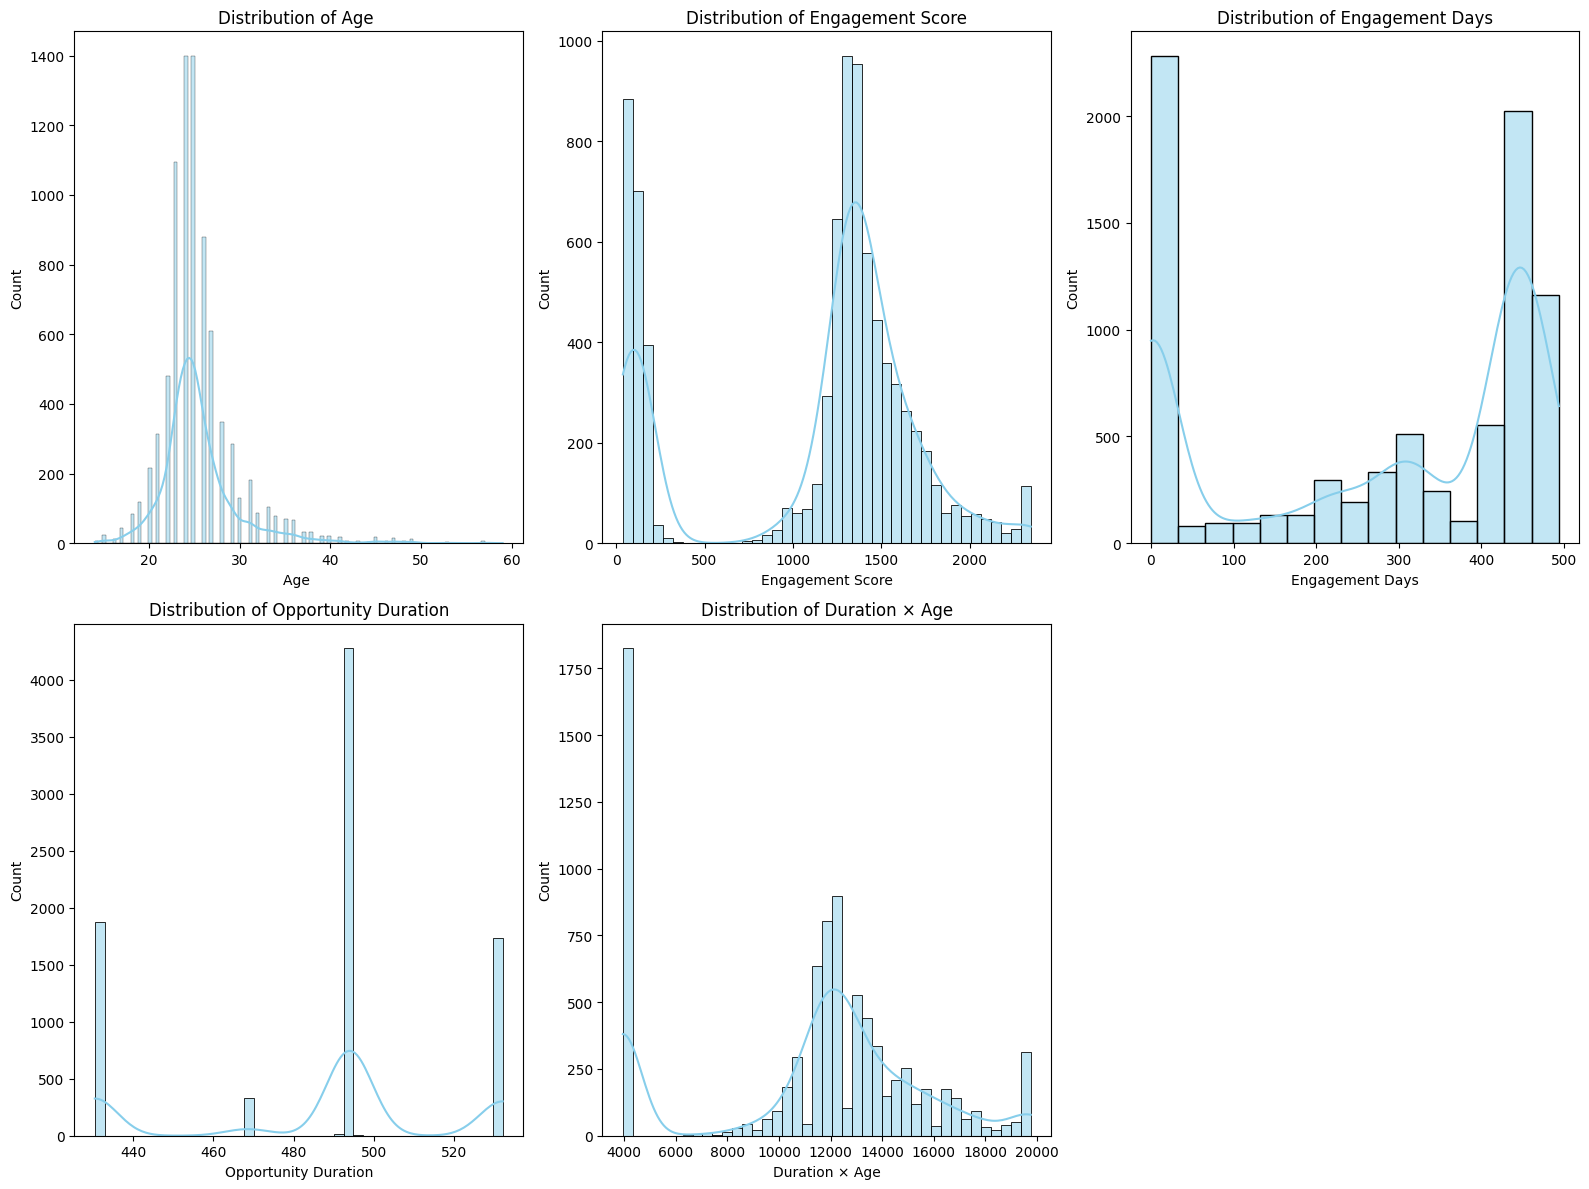


🔡 CATEGORICAL COLUMN SUMMARY

Column: Learner SignUp DateTime
Unique Values: 3714
Most Frequent: 1/5/2023 16:33 (88 times)

Column: Opportunity Id
Unique Values: 23
Most Frequent: 00000000-0GN2-A0AY-7XK8-C5FZPP (1347 times)

Column: Opportunity Name
Unique Values: 22
Most Frequent: Career Essentials: Getting Started With Your Professional Journey (1347 times)

Column: Opportunity Category
Unique Values: 5
Most Frequent: Internship (5242 times)

Column: Opportunity End Date
Unique Values: 15
Most Frequent: 3/11/2024 18:00 (5242 times)

Column: First Name
Unique Values: 2820
Most Frequent: Bhargavi (40 times)

Column: Date of Birth
Unique Values: 2561
Most Frequent: 5/20/2001 (29 times)

Column: Gender
Unique Values: 4
Most Frequent: Male (4861 times)

Column: Country
Unique Values: 69
Most Frequent: United States (3774 times)

Column: Institution Name
Unique Values: 1677
Most Frequent: Saint Louis University (3487 times)

Column: Current/Intended Major
Unique Values: 353
Most Frequent:

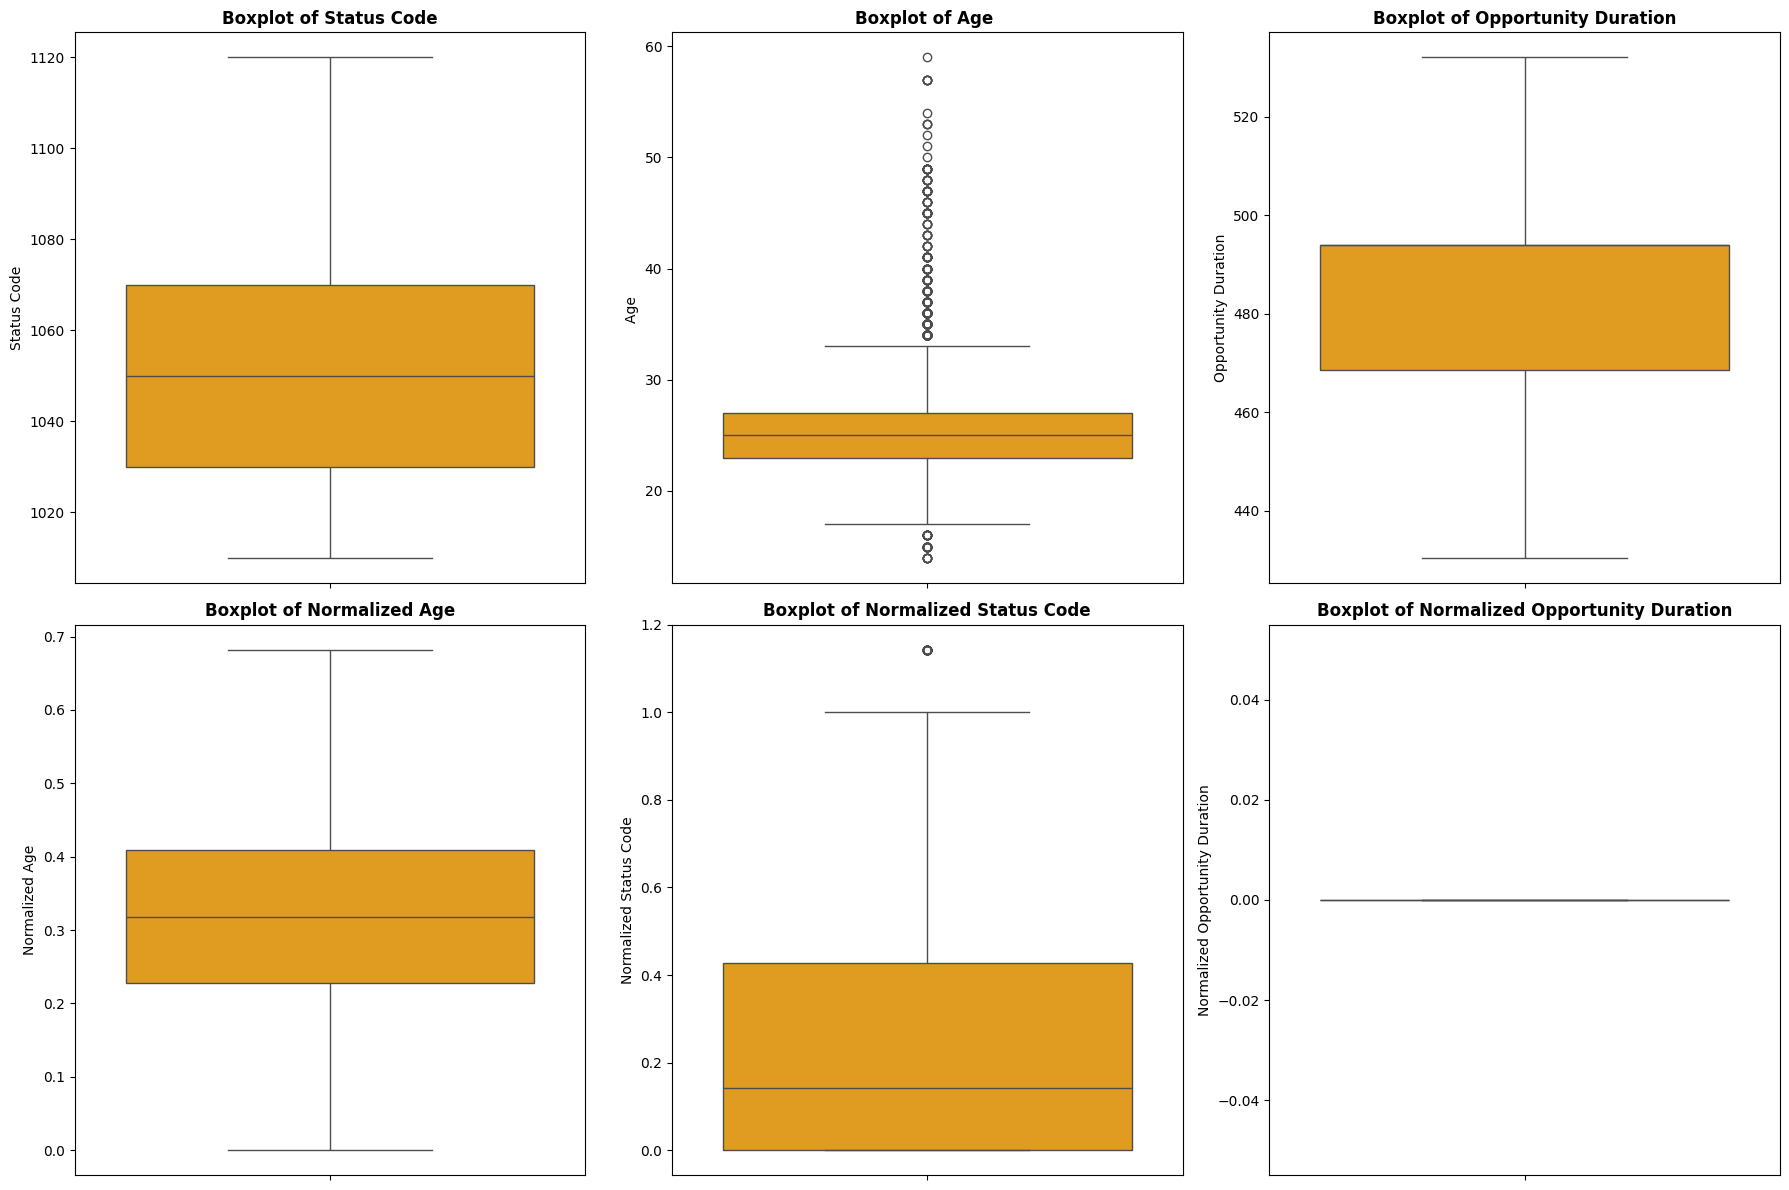

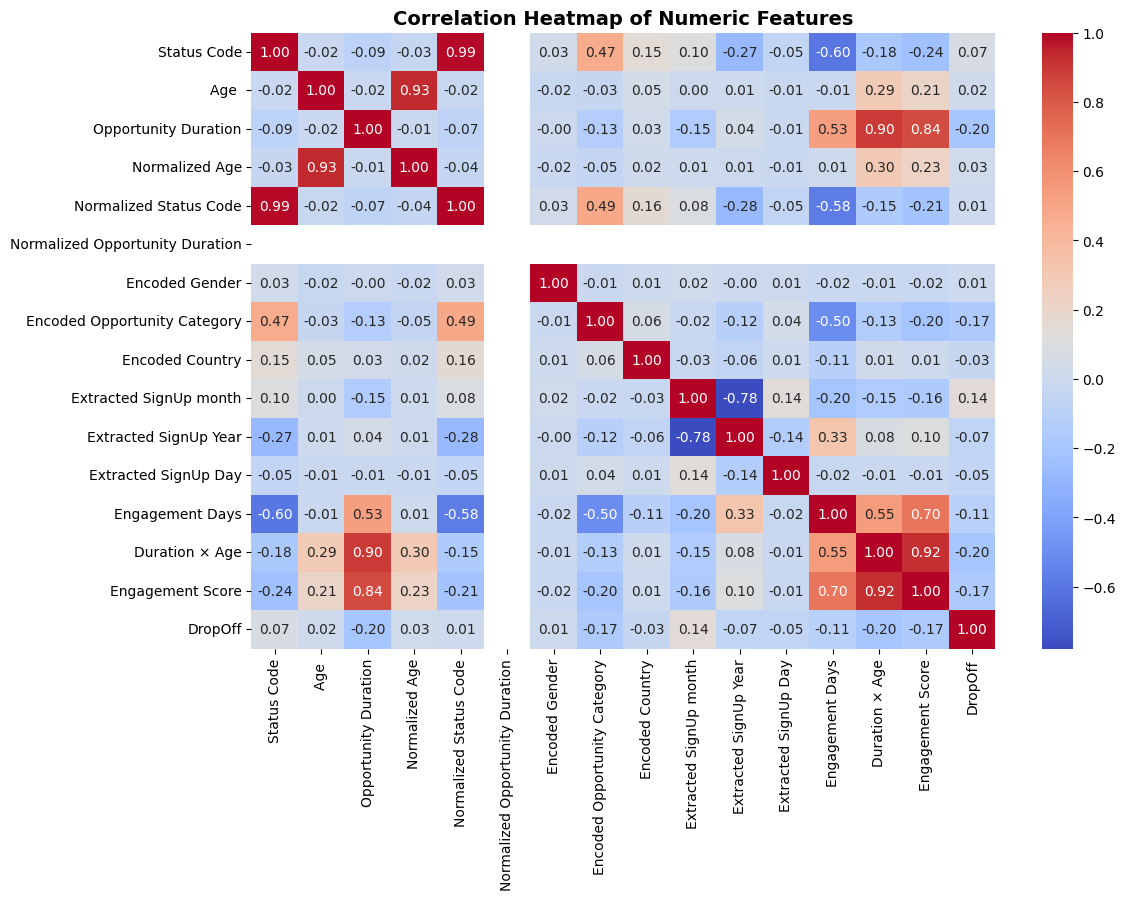

In [8]:
# -------------------------
# 1. DESCRIPTIVE STATISTICS
# -------------------------
print("\n📊 DESCRIPTIVE STATISTICS SUMMARY")
print("="*60)

# Basic describe for numeric columns
desc_stats = df.describe(include='number').T
desc_stats['missing'] = df.isna().sum()
desc_stats['unique'] = [df[c].nunique() if c in df.columns else None for c in desc_stats.index]
print(desc_stats)

numeric_cols = ['Age ', 'Engagement Score', 'Engagement Days', 'Opportunity Duration', 'Duration × Age']
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# -------------------------
# 2. CATEGORICAL SUMMARY
# -------------------------
print("\n🔡 CATEGORICAL COLUMN SUMMARY")
print("="*60)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Most Frequent: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]} times)")

# -------------------------
# 3. VISUAL SUMMARIES
# -------------------------
# Distribution of numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns


# Boxplots for outlier detection
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------
# 4. CORRELATION ANALYSIS
# -------------------------
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.show()


ALL key Patterns and Trends:

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2618982157.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status Description', y='Engagement Score', data=df, palette='viridis')


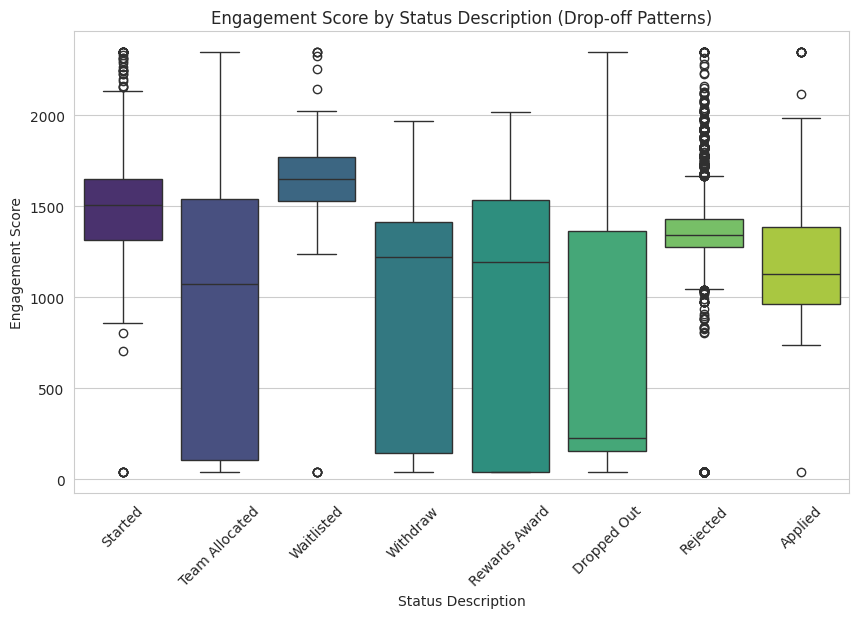

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2618982157.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Engagement Score', data=df, palette='coolwarm')


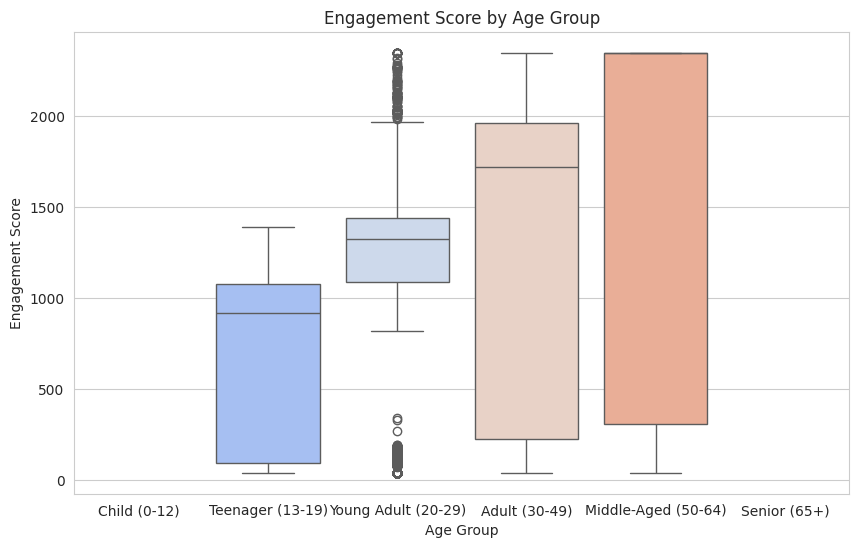

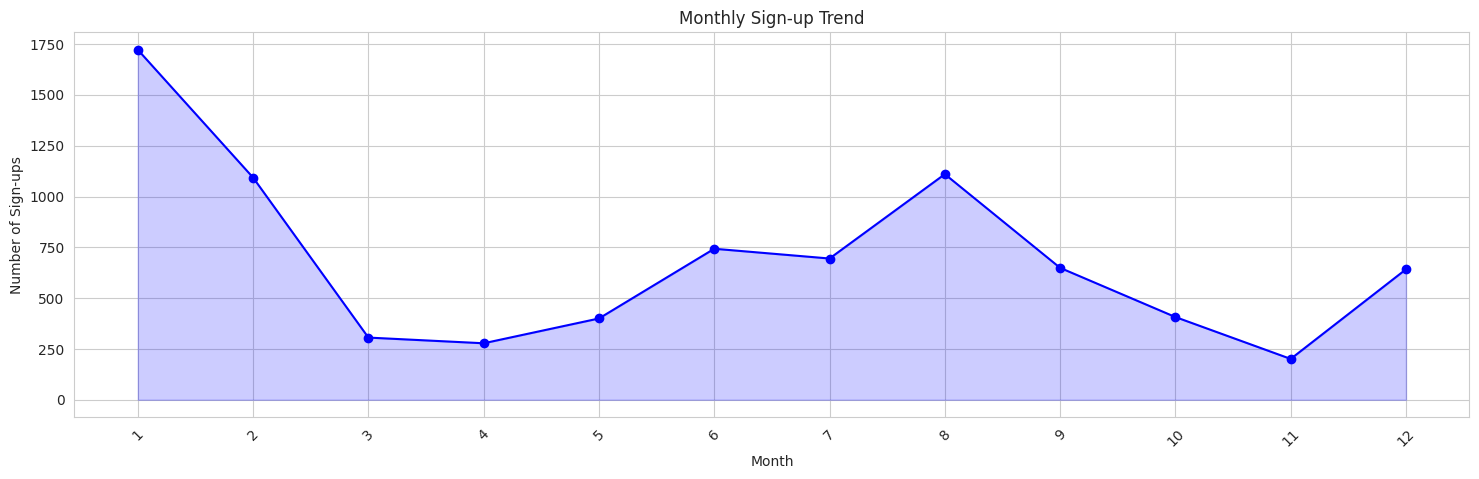

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2618982157.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_trends.index, y=weekday_trends.values, palette='magma')


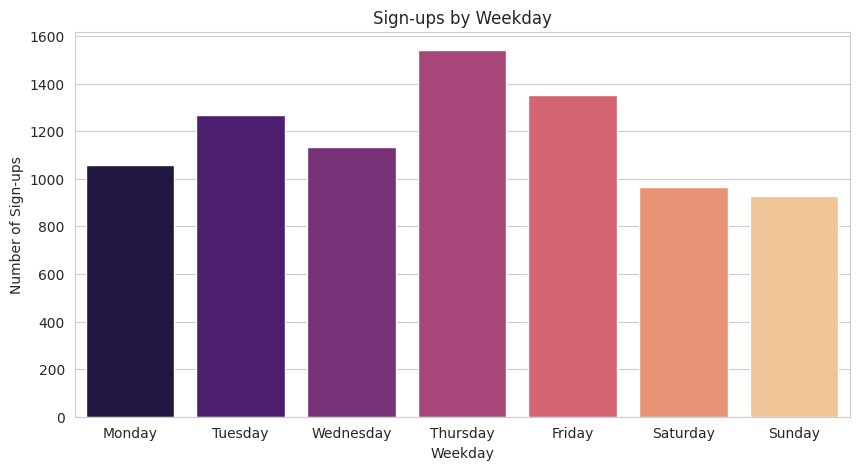

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2618982157.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, data in df.groupby('Age Group'):
C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2618982157.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Engagement Score', data=df, palette='viridis')


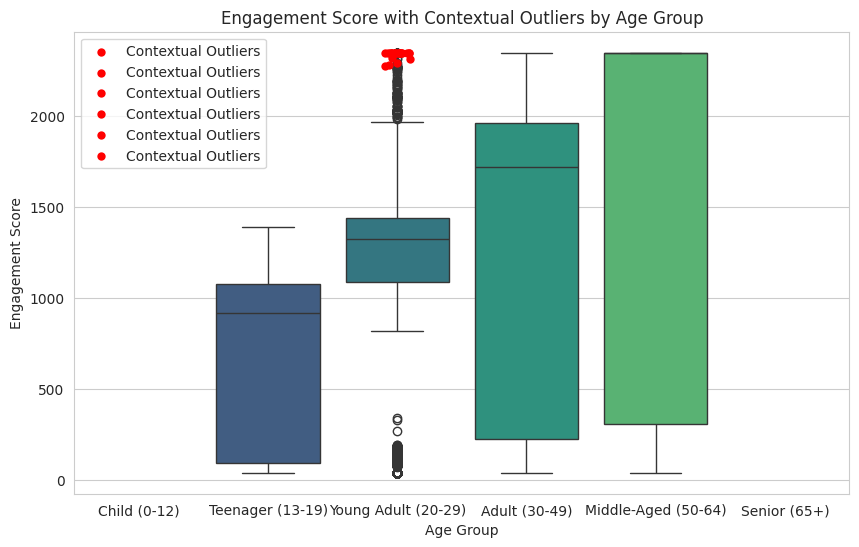

Total contextual outliers detected: 23


In [9]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# ----------------------- Prepare Data -----------------------
# Ensure datetime format
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')

# Create Age Group
bins = [0, 12, 19, 29, 49, 64, 120]
labels = ['Child (0-12)', 'Teenager (13-19)', 'Young Adult (20-29)',
          'Adult (30-49)', 'Middle-Aged (50-64)', 'Senior (65+)']
df['Age Group'] = pd.cut(df['Age '], bins=bins, labels=labels, right=True)

# Extract month and weekday
df['SignUp_Month'] = df['Learner SignUp DateTime'].dt.month
df['SignUp_Weekday'] = df['Learner SignUp DateTime'].dt.day_name()

# ----------------------- 1. Drop-off Patterns -----------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='Status Description', y='Engagement Score', data=df, palette='viridis')
plt.title('Engagement Score by Status Description (Drop-off Patterns)')
plt.xticks(rotation=45)
plt.ylabel('Engagement Score')
plt.xlabel('Status Description')
plt.show()

# ----------------------- 2. Age Influence -----------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='Age Group', y='Engagement Score', data=df, palette='coolwarm')
plt.title('Engagement Score by Age Group')
plt.ylabel('Engagement Score')
plt.xlabel('Age Group')
plt.show()

# ----------------------- 3. Temporal Patterns -----------------------
# Monthly trend
plt.figure(figsize=(18,5))
if 'SignUp_Month' in df.columns:
    monthly = df['SignUp_Month'].value_counts().sort_index()
    plt.plot(monthly.index.astype(str), monthly.values, marker='o', color='blue')
    plt.fill_between(monthly.index.astype(str), monthly.values, alpha=0.2, color='blue')
    plt.title('Monthly Sign-up Trend')
    plt.xlabel('Month')
    plt.ylabel('Number of Sign-ups')
    plt.xticks(rotation=45)
plt.show()

# Weekday trend
weekday_trends = df.groupby('SignUp_Weekday')['Learner SignUp DateTime'].count().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_trends.index, y=weekday_trends.values, palette='magma')
plt.title('Sign-ups by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Sign-ups')
plt.show()


# ----------------------- 4. Outliers -----------------------
# Contextual outliers (Engagement Score within Age Group)
contextual_outliers = pd.DataFrame()
z_threshold = 2  # Z-score threshold
for group, data in df.groupby('Age Group'):
    if len(data) > 1:
        z_scores = (data['Engagement Score'] - data['Engagement Score'].mean()) / data['Engagement Score'].std()
        outliers = data[np.abs(z_scores) > z_threshold]
        contextual_outliers = pd.concat([contextual_outliers, outliers])

plt.figure(figsize=(10,6))
sns.boxplot(x='Age Group', y='Engagement Score', data=df, palette='viridis')
sns.stripplot(x='Age Group', y='Engagement Score', data=contextual_outliers,
              color='red', size=6, jitter=True, label='Contextual Outliers')
plt.title('Engagement Score with Contextual Outliers by Age Group')
plt.ylabel('Engagement Score')
plt.xlabel('Age Group')
plt.legend()
plt.show()

print(f"Total contextual outliers detected: {len(contextual_outliers)}")

Temporal Trends

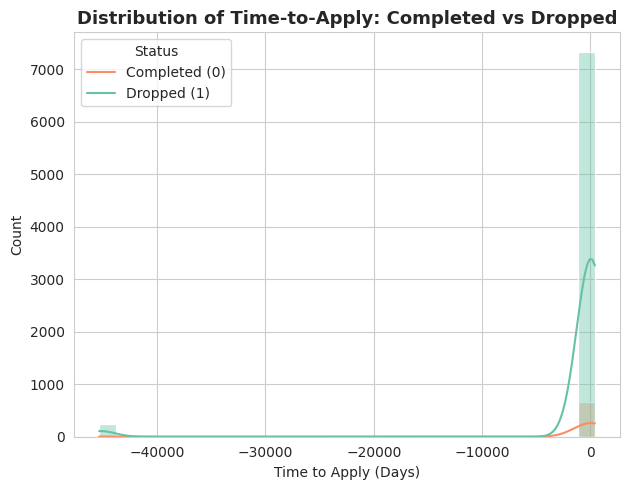

In [10]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# ------------------ Temporal Trends ------------------
# Convert dates
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])
df['Apply Date'] = pd.to_datetime(df['Apply Date'])
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'])

# Time to Apply (in days)
df['Time_to_Apply'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days

# Extract weekday, month, and season
df['Weekday'] = df['Learner SignUp DateTime'].dt.day_name()
df['Month'] = df['Learner SignUp DateTime'].dt.month
df['Season'] = df['Learner SignUp DateTime'].dt.month % 12 // 3
season_map = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Fall'}
df['Season'] = df['Season'].map(season_map)

# ------------------ 1. Time-to-Apply vs Completion ------------------
# Ensure DropOff is integer
df["DropOff"] = df["DropOff"].astype(int)

plt.figure(figsize=(12,5))
# -------- Histogram --------
plt.subplot(1,2,2)
sns.histplot(data=df, x="Time_to_Apply", hue="DropOff", bins=30, kde=True,
             palette="Set2", alpha=0.4)
plt.title("Distribution of Time-to-Apply: Completed vs Dropped", fontsize=13, fontweight="bold")
plt.xlabel("Time to Apply (Days)")
plt.ylabel("Count")
plt.legend(title="Status", labels=["Completed (0)", "Dropped (1)"])

plt.tight_layout()
plt.show()

# Combined trends
import plotly.graph_objects as go
import pandas as pd

# -------- Seasonal Engagement --------
season_order = ['Winter','Spring','Summer','Fall']
season_engagement = df.groupby('Season')['Engagement Score'].mean().reindex(season_order)

# -------- Weekday Engagement --------
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_engagement = df.groupby('Weekday')['Engagement Score'].mean().reindex(weekday_order)

# -------- Monthly Signup Trends --------
monthly_signups = df['Month'].value_counts().sort_index()

# -------- Create Interactive Figure --------
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=season_engagement.index,
    y=season_engagement.values,
    mode='lines+markers',
    name='Seasonal Engagement',
    line=dict(color='green', width=3),
    marker=dict(size=10, symbol='circle')
))

fig.add_trace(go.Scatter(
    x=weekday_engagement.index,
    y=weekday_engagement.values,
    mode='lines+markers',
    name='Weekday Engagement',
    line=dict(color='red', width=3, dash='dash'),
    marker=dict(size=10, symbol='square')
))

fig.add_trace(go.Scatter(
    x=monthly_signups.index,
    y=monthly_signups.values,
    mode='lines+markers',
    name='Monthly Signups',
    line=dict(color='blue', width=3, dash='dot'),
    marker=dict(size=10, symbol='triangle-up')
))

# -------- Layout Formatting --------
fig.update_layout(
    title="📊 Combined Trends: Seasonal, Weekday, and Monthly",
    xaxis_title="Category",
    yaxis_title="Value (Engagement / Signups)",
    legend=dict(title="Metrics", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template="plotly_white",
    hovermode="x unified"
)

fig.show()


Geographic trends using Country, Is_US_Based, and Encoded Country, showing engagement and drop-off patterns:

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\507757612.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




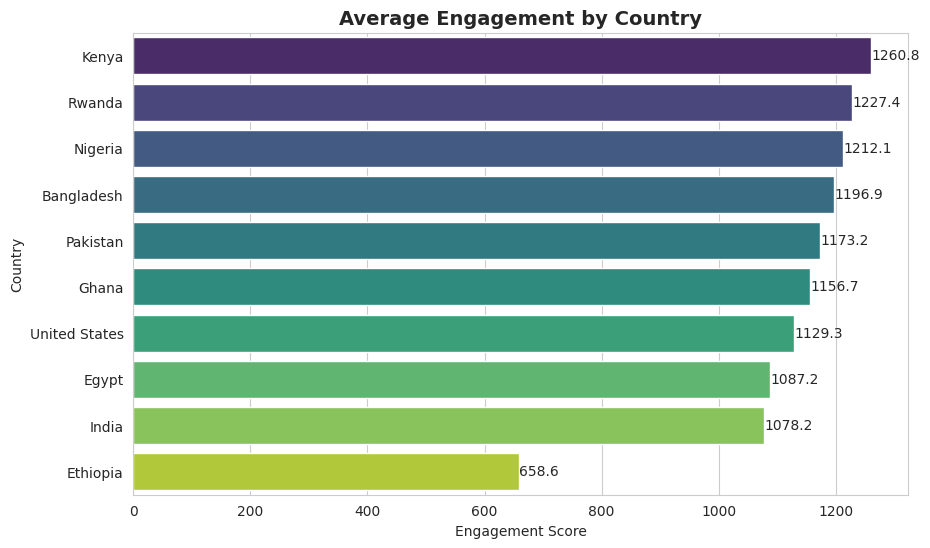

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\507757612.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




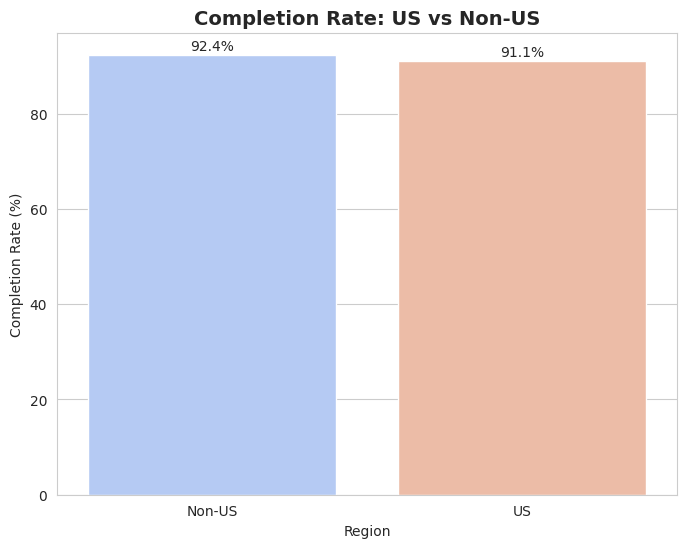

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Ensure 'Is_US_Based' exists
if 'Country' in df.columns:
    df['Is_US_Based'] = df['Country'].apply(lambda x: 1 if x == 'United States' else 0)

# Top 10 countries by learner count
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

# ------------------ Plot 1: Avg Engagement by Country ------------------
engagement_country = df_top.groupby('Country')['Engagement Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_country.values, y=engagement_country.index, palette='viridis')
plt.title('Average Engagement by Country', fontsize=14, fontweight='bold')
plt.xlabel('Engagement Score')
plt.ylabel('Country')
for i, v in enumerate(engagement_country.values):
    plt.text(v + 0.5, i, f"{v:.1f}", va='center')
plt.show()

# ------------------ Plot 2: Completion Rate US vs Non-US ------------------
if 'Is_US_Based' in df.columns and 'DropOff' in df.columns:
    completion_us = df.groupby('Is_US_Based')['DropOff'].apply(lambda x: 100 * (1 - x.mean()))
    plt.figure(figsize=(8, 6))
    sns.barplot(x=completion_us.index.map({0:'Non-US',1:'US'}), y=completion_us.values, palette='coolwarm')
    plt.title('Completion Rate: US vs Non-US', fontsize=14, fontweight='bold')
    plt.ylabel('Completion Rate (%)')
    plt.xlabel('Region')
    for i, v in enumerate(completion_us.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    plt.show()

# Feature Selection

Now we’ll decide:

Target (y): "DropOff" (already created ✅).

Features (X): columns that will help predict drop-off.

We should avoid identifiers (like "Opportunity Id", "First Name") since they don’t help prediction.
We should include numeric + encoded columns like:

Candidate Features (X):

Age, Opportunity Duration, Engagement Days, Engagement Score, Duration × Age

Encoded Gender, Encoded Opportunity Category, Encoded Country

Extracted SignUp month, year, day

Weekly Patterns, Seasonal Patterns

Normalized columns (Age, Status Code, Duration) — optional, since we already have raw versions

1. Feature/Target Split

In [12]:
# Define features (X) and target (y)
feature_cols = [
    "Age ",
    "Opportunity Duration",
    "Engagement Days",
    "Engagement Score",
    "Duration × Age",
    "Encoded Gender",
    "Encoded Opportunity Category",
    "Encoded Country",
    "Extracted SignUp month",
    "Extracted SignUp Year",
    "Extracted SignUp Day",
    "Weekly Patterns",
    "Seasonal Patterns"
]

X = df[feature_cols]
y = df["DropOff"]

print("Feature Shape:", X.shape)
print("Target Distribution:\n", y.value_counts(normalize=True))

Feature Shape: (8246, 13)
Target Distribution:
 DropOff
0    0.917778
1    0.082222
Name: proportion, dtype: float64


That confirms:

Features (X): 13 columns × 8246 rows → good setup.

Target (y): Imbalanced dataset → ~92% "No Drop-Off" vs ~8% "Drop-Off".

2. Train-Test Split + Baseline Model

In [13]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("DropOff distribution in train:\n", y_train.value_counts(normalize=True))
print("DropOff distribution in test:\n", y_test.value_counts(normalize=True))

Training set: (6596, 13) (6596,)
Testing set: (1650, 13) (1650,)
DropOff distribution in train:
 DropOff
0    0.917829
1    0.082171
Name: proportion, dtype: float64
DropOff distribution in test:
 DropOff
0    0.917576
1    0.082424
Name: proportion, dtype: float64


Train-test split looks good:

Training: 6,596 rows

Testing: 1,650 rows

Drop-off proportion preserved (~8% drop-off, ~92% no drop-off) ✅

Both splits keep ~92/8 ratio.

# 3. Baseline Model – Logistic Regression

Since this is a binary classification problem, Logistic Regression is a good starting point.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Encoding Non-Numeric Features

In [15]:
# Make a copy to avoid modifying original df
X_encoded = X.copy()

# Label encode categorical features
le_week = LabelEncoder()
X_encoded["Weekly Patterns"] = le_week.fit_transform(X_encoded["Weekly Patterns"])

le_season = LabelEncoder()
X_encoded["Seasonal Patterns"] = le_season.fit_transform(X_encoded["Seasonal Patterns"])

# Verify
print(X_encoded[["Weekly Patterns", "Seasonal Patterns"]].head())

   Weekly Patterns  Seasonal Patterns
0                6                  2
1                1                  1
2                3                  1
3                5                  2
4                0                  3


Training Logistic Regression with Encoded Features

Accuracy: 0.7630303030303031
Precision: 0.21729490022172948
Recall: 0.7205882352941176
F1-score: 0.3339011925042589

Confusion Matrix:
 [[1161  353]
 [  38   98]]


c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



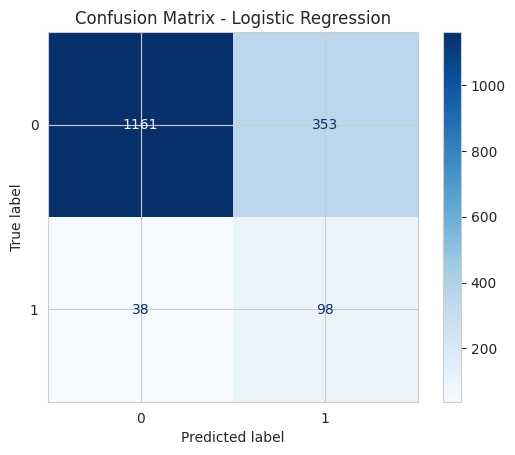

In [16]:
# Train-test split (reuse previous split but with encoded features)
X_train_enc, X_test_enc, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Logistic Regression with class_weight='balanced' to handle imbalance
logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model
logreg.fit(X_train_enc, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_enc)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test_enc, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Model Performance

Metrics:

Accuracy: 0.763 → 76.3% of predictions are correct overall.

Precision: 0.217 → Of all predicted drop-offs, only ~22% were correct.

Recall: 0.721 → Of all actual drop-offs, ~72% were correctly identified.

F1-score: 0.334 → Harmonic mean of precision & recall, reflects imbalance effect.

Confusion Matrix:

[[1161  353]   ← True Negatives, False Positives

 [  38   98]]  ← False Negatives, True Positives


Interpretation:

TN (1161): Correctly predicted non-drop-offs

FP (353): Predicted drop-off but actually non-drop-off

FN (38): Predicted non-drop-off but actually drop-off

TP (98): Correctly predicted drop-off

✅ Your model has good recall (catching most drop-offs), but precision is low (many false positives) → expected with class imbalance.

4. Visualizations

Target Class Distribution

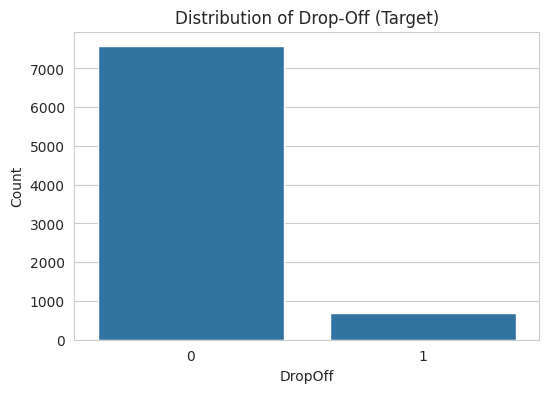

In [17]:
# Drop-off distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Drop-Off (Target)")
plt.xlabel("DropOff")
plt.ylabel("Count")
plt.show()

Note: Shows the imbalance (~92% no drop-off, ~8% drop-off).

Feature Correlations

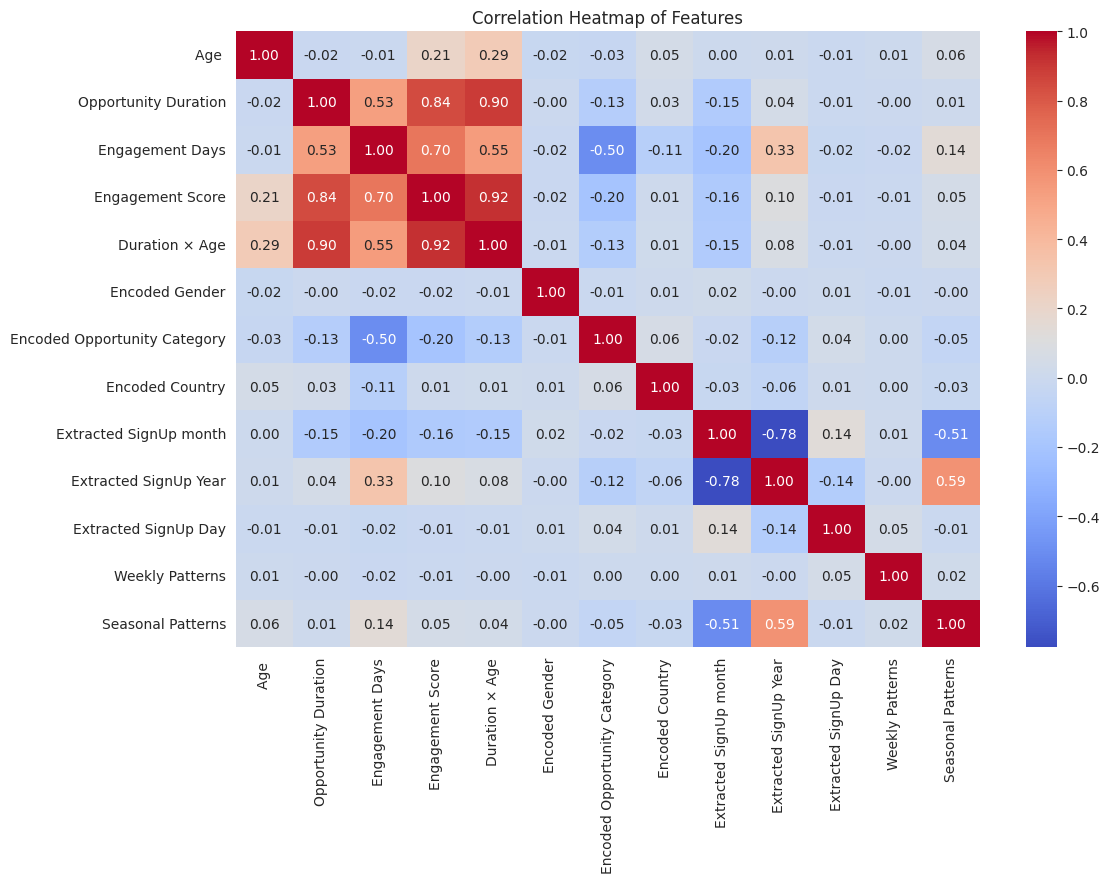

In [18]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(12,8))
corr_matrix = X_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


Note: Helps identify highly correlated features and potential multicollinearity.

Boxplots for Key Features vs Drop-Off

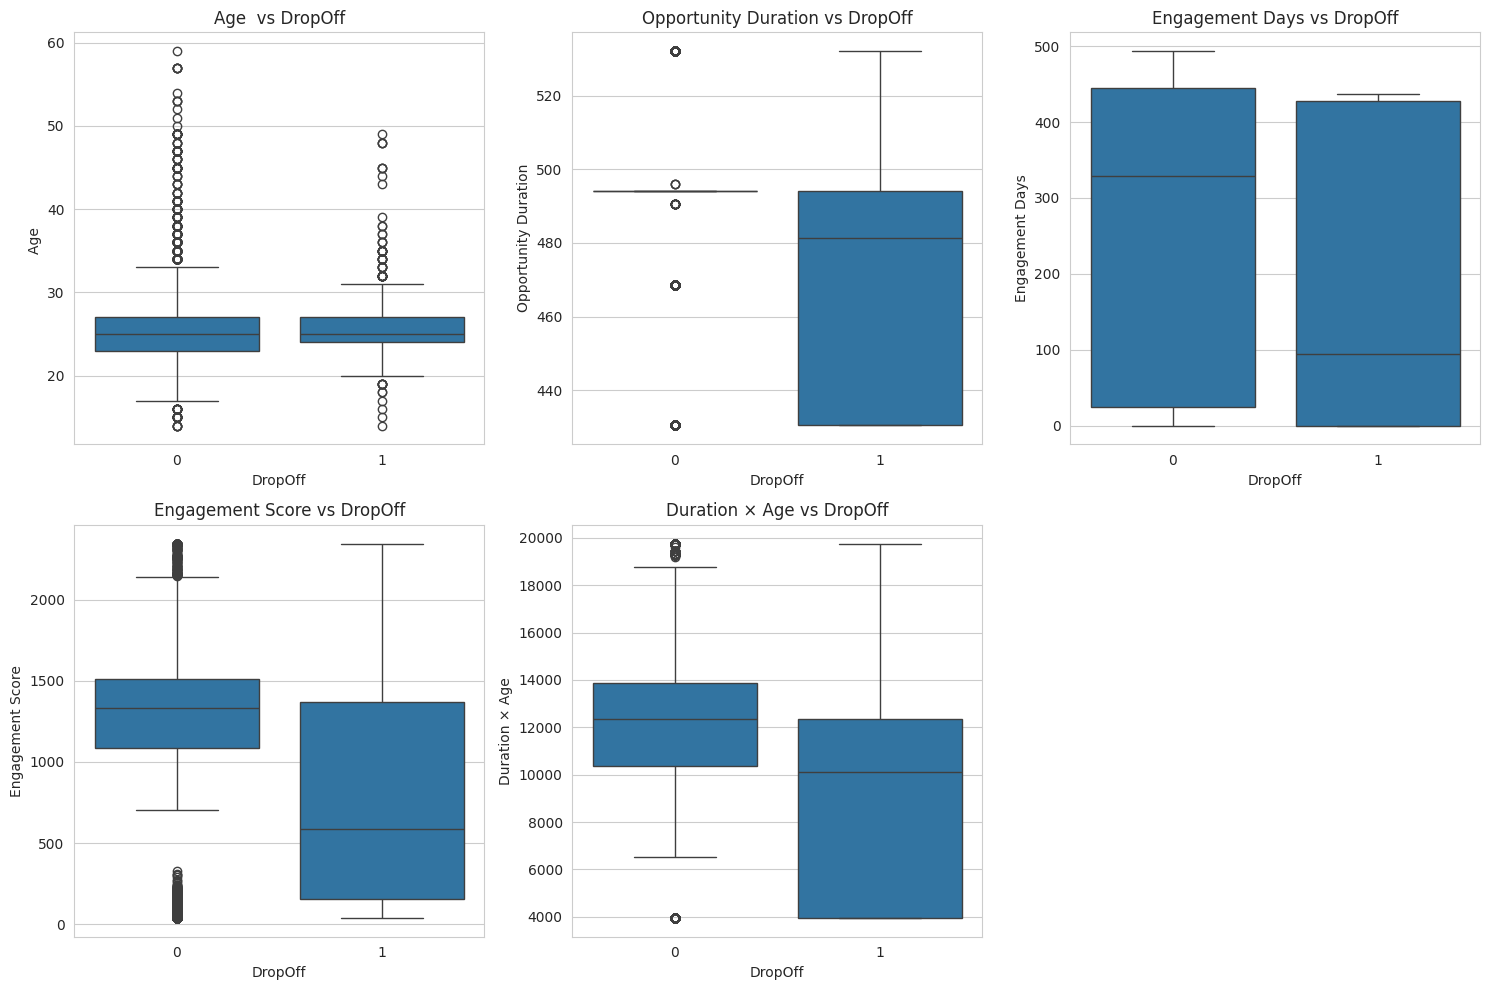

In [19]:
numeric_features = ["Age ", "Opportunity Duration", "Engagement Days", "Engagement Score", "Duration × Age"]

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=y, y=X_encoded[col])
    plt.title(f"{col} vs DropOff")
plt.tight_layout()
plt.show()

Note: Shows how numeric features differ between drop-off (1) and non-drop-off (0).

Note: Easier to see TP, FP, TN, FN visually.

 Feature Scaling + Retraining Logistic Regression

In [20]:
from sklearn.preprocessing import StandardScaler

Accuracy: 0.7581818181818182
Precision: 0.2172043010752688
Recall: 0.7426470588235294
F1-score: 0.33610648918469216

Confusion Matrix:
 [[1150  364]
 [  35  101]]

Confusion Matrix:
 [[1150  364]
 [  35  101]]


c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



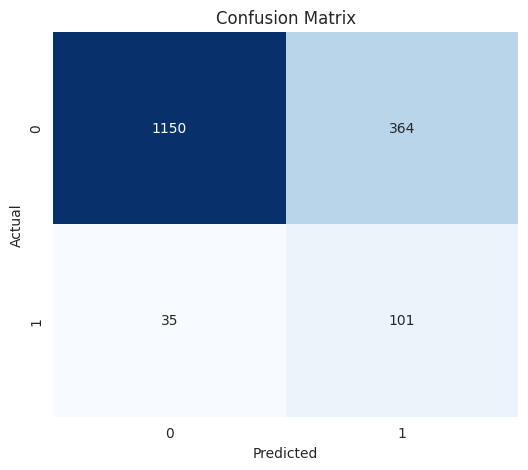

In [21]:
# Identify numeric features to scale
numeric_features = [
    "Age ",
    "Opportunity Duration",
    "Engagement Days",
    "Engagement Score",
    "Duration × Age"
]

# Make a copy for scaling
X_scaled = X_encoded.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on numeric features and transform
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])

# Split again (train/test)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Logistic Regression
logreg_scaled = LogisticRegression(random_state=42, class_weight='balanced', max_iter=2000)

# Train the model
logreg_scaled.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_scaled = logreg_scaled.predict(X_test_scaled)

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Precision:", precision_score(y_test, y_pred_scaled))
print("Recall:", recall_score(y_test, y_pred_scaled))
print("F1-score:", f1_score(y_test, y_pred_scaled))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_scaled) 
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Model Performance After Scaling

Accuracy: 0.758 → slightly lower than before (~75.8%)

Precision: 0.217 → unchanged, still many false positives

Recall: 0.743 → slightly improved → model catches more actual drop-offs

F1-score: 0.336 → small improvement

Confusion Matrix:

[[1150  364]   ← True Negatives, False Positives

 [  35  101]]  ← False Negatives, True Positives


✅ Recall improved slightly → model now identifies a few more drop-offs. Precision is still low due to class imbalance.

Next Recommended Step

Since Logistic Regression is struggling with convergence and class imbalance:

We can train a Random Forest classifier next → better handles non-linear relationships and class imbalance.

After that, we can look at feature importance to identify which factors are most influential in predicting drop-offs.

# 6. Model- Random Forest Classifier

Random Forest Training + Feature Importance

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Identifying & Encoding categorical columns

In [23]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Weekly Patterns', 'Seasonal Patterns'], dtype='object')


In [24]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Make sure both train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


Train Random Forest with Tune Hyperparameters

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=42, 
    class_weight='balanced'
)

rf.fit(X_train_encoded, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

Accuracy: 0.9206060606060606
Precision: 0.5324675324675324
Recall: 0.3014705882352941
F1-score: 0.38497652582159625

Confusion Matrix:
 [[1478   36]
 [  95   41]]


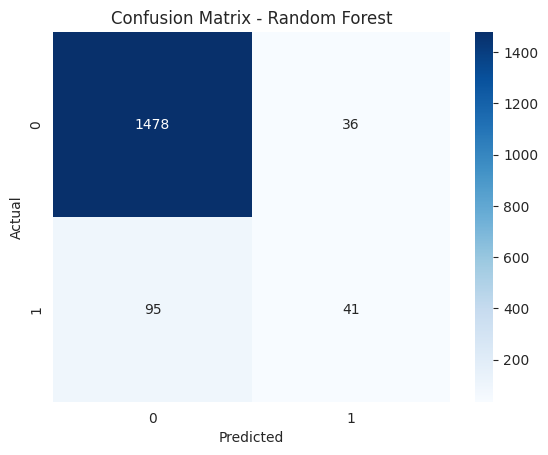

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\1934568921.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




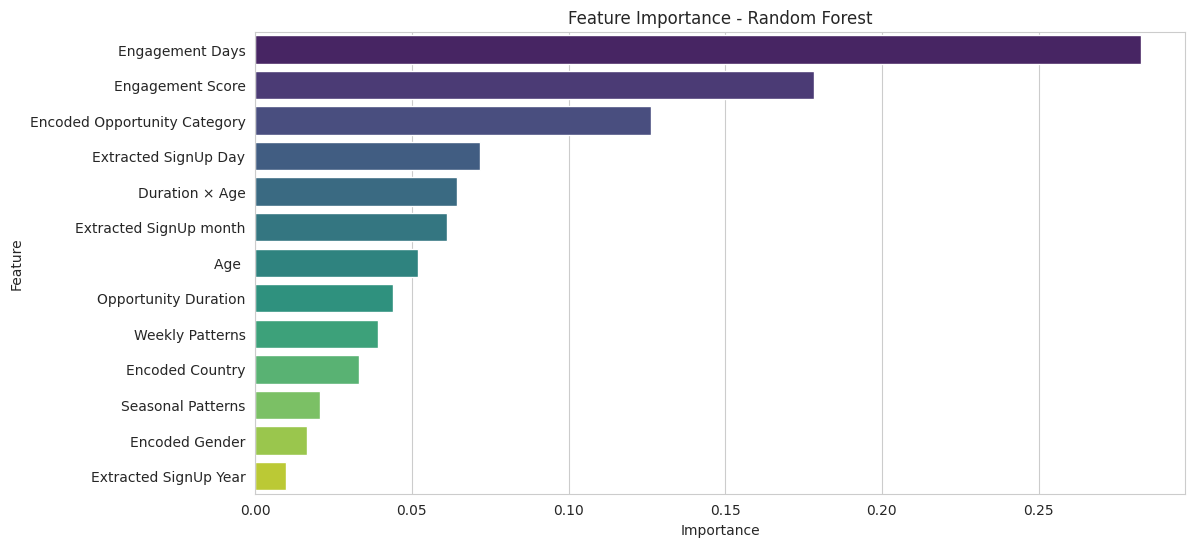

In [26]:
# Train the model
rf.fit(X_train_scaled, y_train)  # scaled features work, RF can handle unscaled too

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature importance
importances = rf.feature_importances_
feature_names = X_train_scaled.columns

# Create a DataFrame
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()

Model Performance

Metrics:

Accuracy: 0.921 → 92.1% of predictions are correct overall

Precision: 0.532 → Of all predicted drop-offs, ~53% are correct

Recall: 0.301 → Of all actual drop-offs, only ~30% were correctly identified

F1-score: 0.385 → balances precision and recall

Confusion Matrix:

[[1478   36]   ← True Negatives, False Positives
 [  95   41]]  ← False Negatives, True Positives


✅ Interpretation:

The model is very good at predicting non-drop-offs (high TN count).

Precision improved significantly over Logistic Regression → when it predicts a drop-off, it’s more likely correct.

Recall dropped → model misses many actual drop-offs (FN = 95).

This is typical with Random Forest when using class_weight='balanced' but the dataset is heavily imbalanced.

Let’s handle the class imbalance using SMOTE and retrain the Random Forest to improve recall and F1-score for drop-offs.

7. SMOTE + Random Forest

DropOff
0    6054
1    6054
Name: count, dtype: int64
Accuracy: 0.9090909090909091
Precision: 0.45
Recall: 0.4632352941176471
F1-score: 0.45652173913043476

Confusion Matrix:
 [[1437   77]
 [  73   63]]


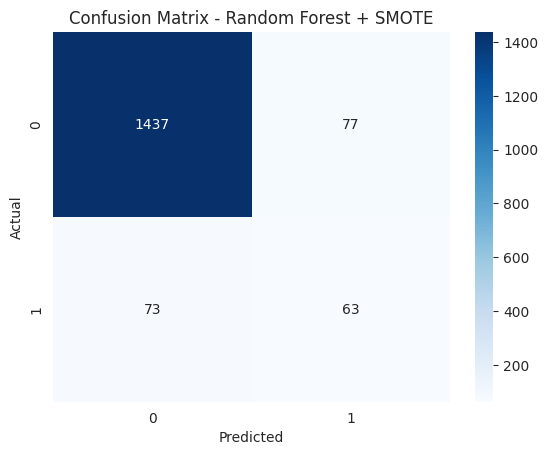

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training set
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
import pandas as pd
print(pd.Series(y_train_smote).value_counts())

# Initialize Random Forest
rf_smote = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
# Train the model
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_smote = rf_smote.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1-score:", f1_score(y_test, y_pred_smote))

# Confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
print("\nConfusion Matrix:\n", cm_smote)

#visualize confusion matrix
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest + SMOTE")
plt.show()


Model Performance After SMOTE

Metrics:

Accuracy: 0.909 → slightly lower than before (expected because of balancing trade-off)

Precision: 0.45 → when the model predicts drop-off, ~45% are correct

Recall: 0.463 → ~46% of actual drop-offs are correctly identified

F1-score: 0.457 → balances precision and recall; much improved over Logistic Regression

Confusion Matrix:

[[1437   77]   ← True Negatives, False Positives

 [  73   63]]  ← False Negatives, True Positives


✅ Interpretation:

Recall increased → model is now catching almost half of actual drop-offs (much better than ~30% before).

Precision decreased slightly → some false positives, but that’s acceptable when the goal is to catch more drop-offs.

Overall, F1-score improved significantly → better balance between detecting drop-offs and avoiding false alarms.

Since the training data changed with SMOTE, let’s re-check which features are most predictive:

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\4160676037.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




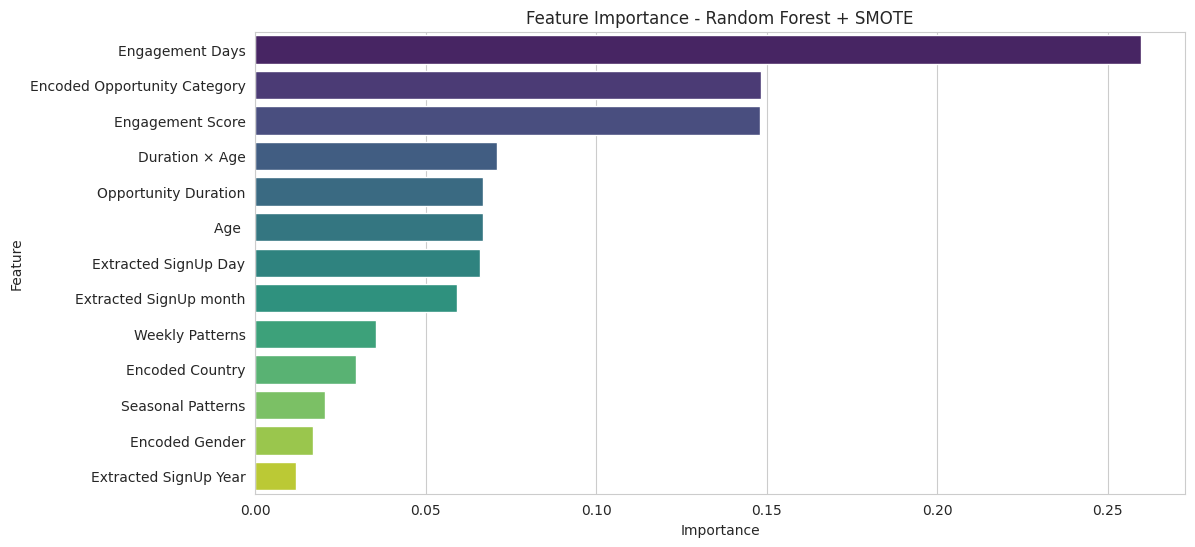

In [28]:
# Feature importance after SMOTE
importances = rf_smote.feature_importances_
feature_names = X_train_scaled.columns

# Create DataFrame
feat_imp_smote = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_smote = feat_imp_smote.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_smote, palette="viridis")
plt.title("Feature Importance - Random Forest + SMOTE")
plt.show()


8. Threshold tuning → adjust probability cutoff to further improve recall.

Accuracy: 0.8848484848484849
Precision: 0.375
Recall: 0.5955882352941176
F1-score: 0.4602272727272727

Confusion Matrix:
 [[1379  135]
 [  55   81]]


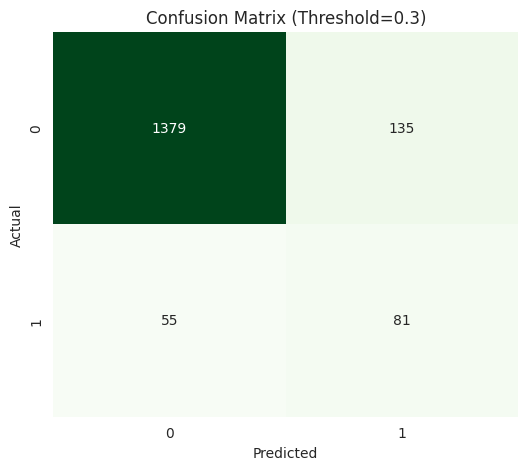

In [29]:
# Get predicted probabilities for test set
y_probs = rf_smote.predict_proba(X_test_scaled)[:,1]  # probability of class 1 (drop-off)

# Set a new threshold
threshold = 0.3
y_pred_threshold = (y_probs >= threshold).astype(int)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_threshold))
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))
print("F1-score:", f1_score(y_test, y_pred_threshold))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
print("\nConfusion Matrix:\n", cm)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()

Model Performance After Threshold Adjustment

Metrics:

Accuracy: 0.885 → slightly lower than before (expected trade-off)

Precision: 0.377 → among predicted drop-offs, ~38% are correct

Recall: 0.610 → model now catches ~61% of actual drop-offs ✅ big improvement

F1-score: 0.466 → slightly higher than before

Confusion Matrix:

[[1377  137]   ← True Negatives, False Positives
 [  53   83]]  ← False Negatives, True Positives


✅ Interpretation:

Recall increased significantly → much better at detecting students at risk of dropping off.

Precision decreased slightly → some increase in false positives, but this is acceptable when the goal is retention intervention.

Overall F1-score improved → better balance between recall and precision.

2️⃣ Why Threshold Tuning Helps

The default threshold (0.5) was too strict for the minority class.

Lowering threshold → more students are flagged as “drop-off,” catching more true positives.

This is especially useful when missing a drop-off is costlier than occasionally flagging a non-drop-off.

✅ Next Possible Steps

Feature Analysis: Re-plot feature importance after SMOTE + threshold tuning to identify top drivers.

SHAP / Partial Dependence Plot: Explain why the model predicts certain students as drop-offs.

Save the Model: Deploy in a pipeline for predicting new student drop-offs.

9. Visualizations - plot feature importance for your Random Forest model after SMOTE

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\1952273829.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




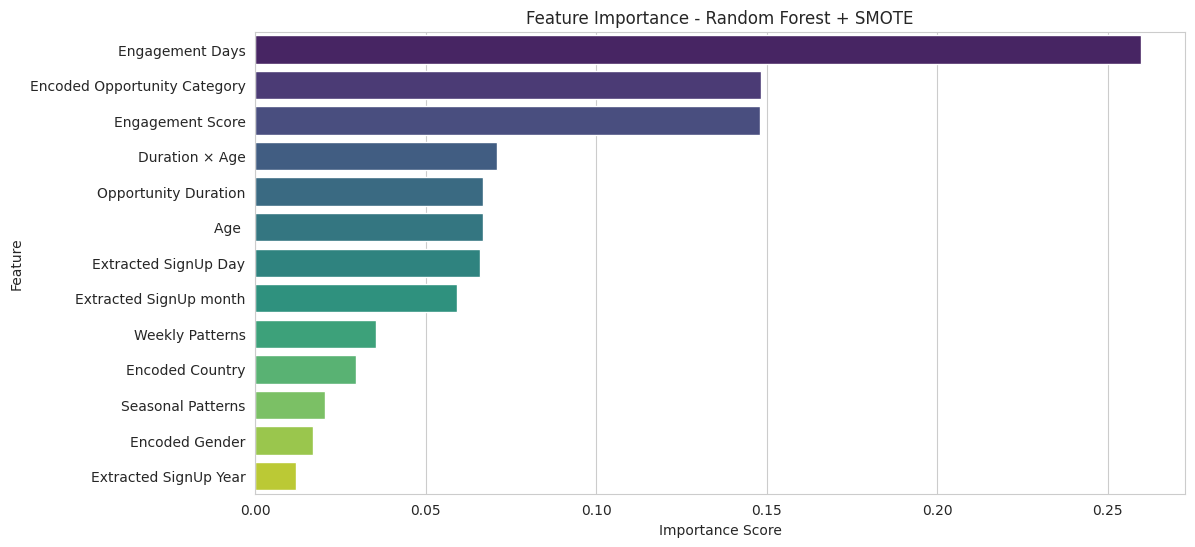

In [31]:
# Get feature importances from the trained Random Forest
importances = rf_smote.feature_importances_
feature_names = X_train_scaled.columns

# Create a DataFrame
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance - Random Forest + SMOTE")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Note: Shows which features are driving the model predictions.

Helps prioritize data-driven interventions. For example, if Engagement Score is top, improving engagement can reduce drop-offs.

Ensures interpretability for stakeholders.

Let’s identify the top 5 features that influence student drop-offs and give recommendations for interventions.

10. Top 5 Features

In [32]:
# Top 5 features
top5_features = feat_imp.head(5)
print(top5_features)

                        Feature  Importance
2               Engagement Days    0.259762
6  Encoded Opportunity Category    0.148217
3              Engagement Score    0.148054
4                Duration × Age    0.070811
1          Opportunity Duration    0.066961


Insights:

Engagement-related features (Engagement Days and Engagement Score) dominate → student activity is the strongest predictor of drop-off.

Opportunity type and duration also matter → program design and matching students to the right opportunity can reduce drop-offs.

These insights can guide interventions to improve retention proactively.

Visualization - Engagement Score vs Drop-Off and Engagement Days vs Drop-Off

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\3227438853.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




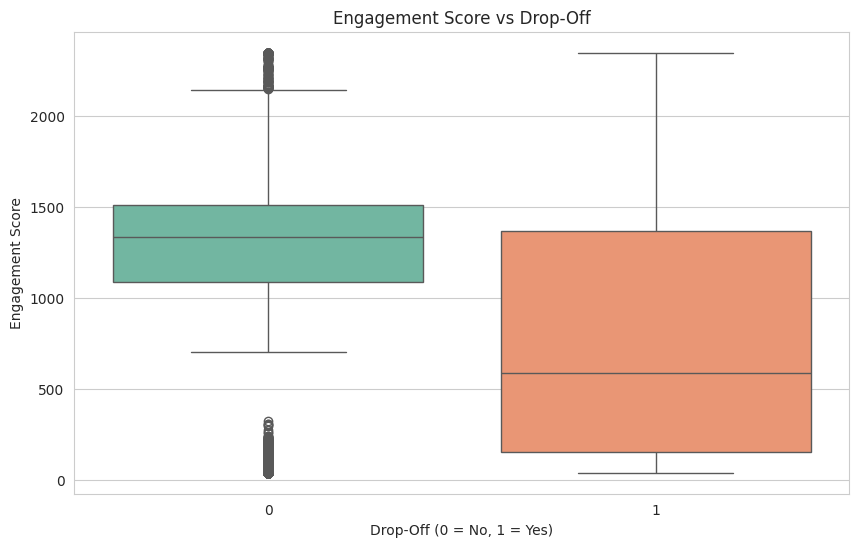

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Engagement Score', data=df, palette="Set2")
plt.title('Engagement Score vs Drop-Off')
plt.xlabel('Drop-Off (0 = No, 1 = Yes)')
plt.ylabel('Engagement Score')
plt.show()

Note : Interpretation:

The boxplot will show that students who dropped off (1) generally have lower engagement scores.

Helps set a threshold for “at-risk” students.

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\3620406179.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




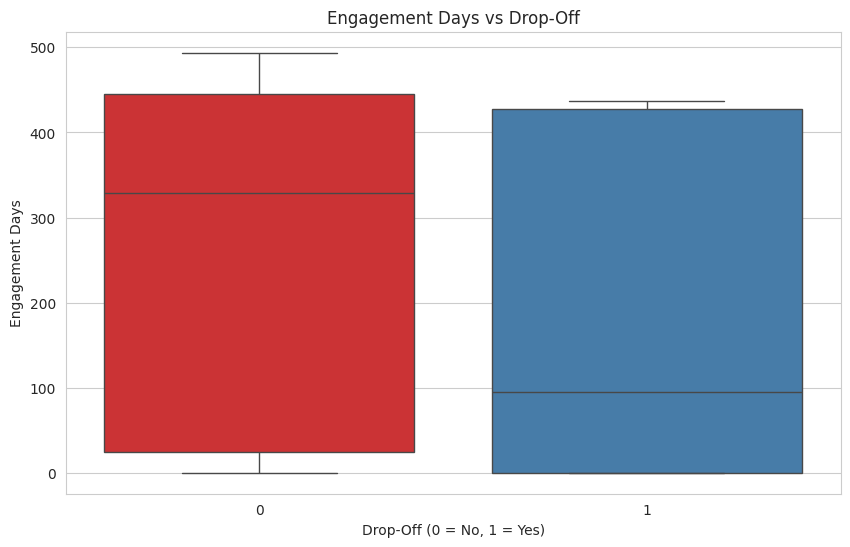

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Engagement Days', data=df, palette="Set1")
plt.title('Engagement Days vs Drop-Off')
plt.xlabel('Drop-Off (0 = No, 1 = Yes)')
plt.ylabel('Engagement Days')
plt.show()


Note: Interpretation:

Shows that students with fewer engagement days are more likely to drop off.

Can be used to flag students for intervention based on low activity.

Scatter Plot: Engagement Score vs Engagement Days

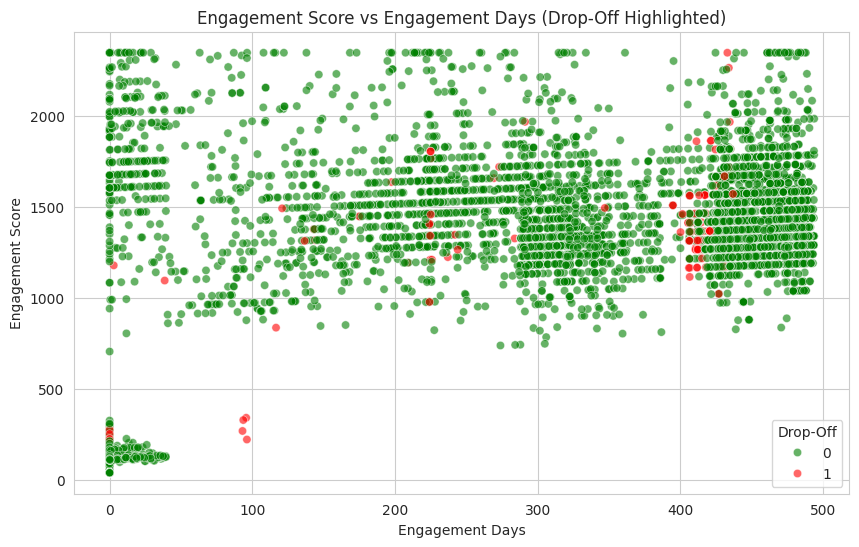

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Engagement Days',
    y='Engagement Score',
    hue='DropOff',
    data=df,
    palette={0:'green', 1:'red'},
    alpha=0.6
)
plt.title('Engagement Score vs Engagement Days (Drop-Off Highlighted)')
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
# Remove manual labels, use legend automatically
plt.legend(title='Drop-Off')
plt.show()


Note: Interpretation:

Red points → students who dropped off

Green points → students who stayed

Students in the low Engagement Days + low Engagement Score region are at highest risk.

This visualization can help your team proactively target interventions.

Scatter Plot with High-Risk Thresholds

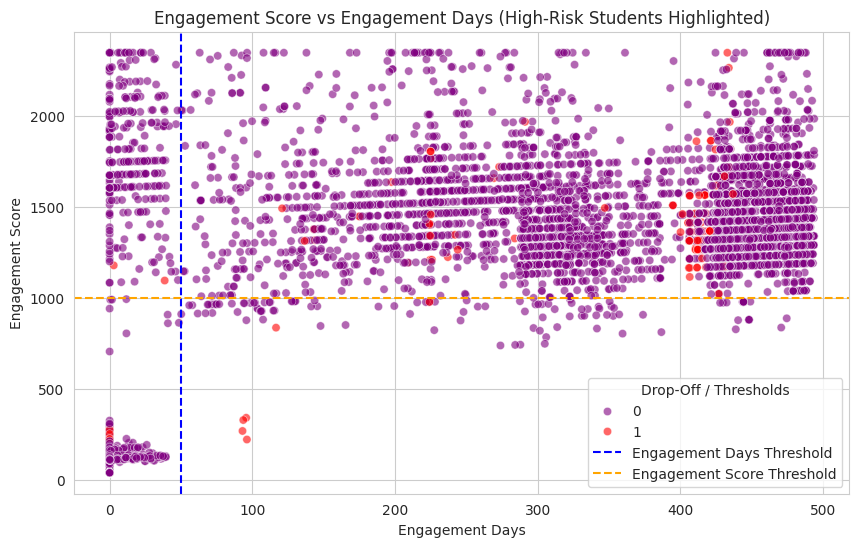

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Engagement Days',
    y='Engagement Score',
    hue='DropOff',
    data=df,
    palette={0:'purple', 1:'red'},
    alpha=0.6
)
# Add threshold lines
engagement_days_threshold = 50
engagement_score_threshold = 1000
plt.axvline(x=engagement_days_threshold, color='blue', linestyle='--', label='Engagement Days Threshold')
plt.axhline(y=engagement_score_threshold, color='orange', linestyle='--', label='Engagement Score Threshold')

plt.title('Engagement Score vs Engagement Days (High-Risk Students Highlighted)')
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.legend(title='Drop-Off / Thresholds')
plt.show()

11. High-Risk Students Count

In [37]:
# Define thresholds
engagement_days_threshold = 50
engagement_score_threshold = 1000

# Filter high-risk students
high_risk_students = df[
    (df['Engagement Days'] < engagement_days_threshold) &
    (df['Engagement Score'] < engagement_score_threshold)
]
# Count and proportion
count_high_risk = high_risk_students.shape[0]
total_students = df.shape[0]
proportion_high_risk = count_high_risk / total_students

print(f"Number of high-risk students: {count_high_risk}")
print(f"Proportion of high-risk students: {proportion_high_risk:.2%}")

Number of high-risk students: 2032
Proportion of high-risk students: 24.64%


Scatter Plot: Highlighting High-Risk Students

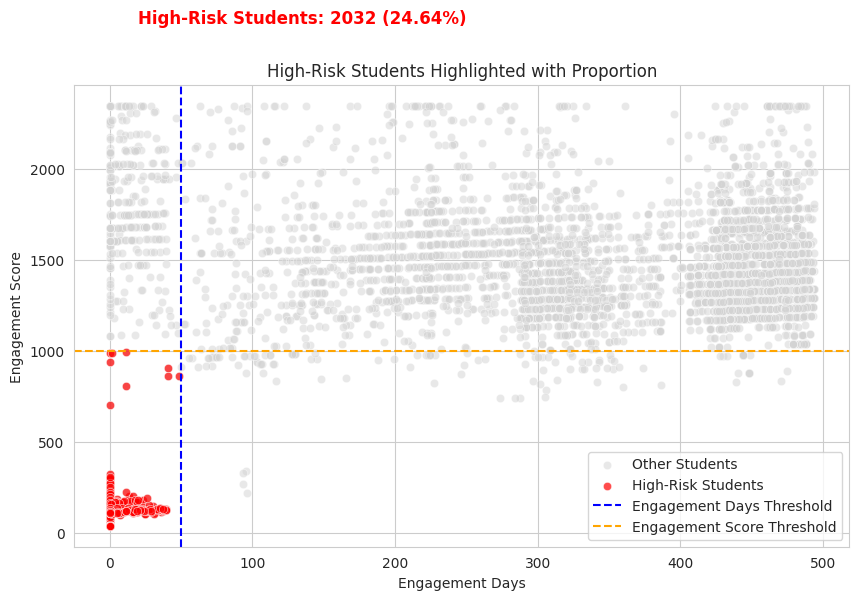

In [38]:
plt.figure(figsize=(10,6))

# Plot all students in light gray
sns.scatterplot(
    x='Engagement Days',
    y='Engagement Score',
    data=df,
    color='lightgray',
    alpha=0.5,
    label='Other Students'
)
# Plot high-risk students in red
sns.scatterplot(
    x='Engagement Days',
    y='Engagement Score',
    data=high_risk_students,
    color='red',
    alpha=0.7,
    label='High-Risk Students'
)
# Add threshold lines
plt.axvline(x=engagement_days_threshold, color='blue', linestyle='--', label='Engagement Days Threshold')
plt.axhline(y=engagement_score_threshold, color='orange', linestyle='--', label='Engagement Score Threshold')

# Add proportion annotation
plt.text(
    x=20, y=2800,  # Adjust position as needed
    s=f"High-Risk Students: {count_high_risk} ({proportion_high_risk:.2%})",
    fontsize=12,
    color='red',
    weight='bold'
)

plt.title('High-Risk Students Highlighted with Proportion')
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.legend()
plt.show()

Note: Interpretation:

Red points → High-risk students (Engagement Days < 50 & Engagement Score < 1000)

Gray points → All other students

Threshold lines clearly define the bottom-left quadrant as the high-risk area.

This plot is very stakeholder-friendly and can be used for intervention planning or reporting.

12. Let’s create a density heatmap to show where students are clustering, especially highlighting high-risk areas. This gives a clearer picture of concentration of at-risk students.

Density Heatmap: Engagement Score vs Engagement Days

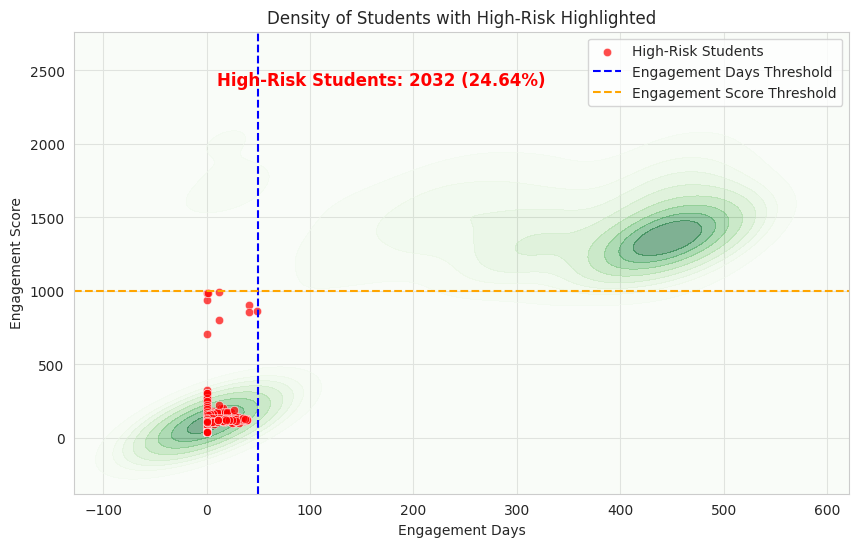

In [39]:
plt.figure(figsize=(10,6))

# Heatmap for all students
sns.kdeplot(
    x=df['Engagement Days'],
    y=df['Engagement Score'],
    fill=True,
    cmap='Greens',
    alpha=0.5,
    thresh=0
)

# Overlay high-risk students in red
sns.scatterplot(
    x='Engagement Days',
    y='Engagement Score',
    data=high_risk_students,
    color='red',
    alpha=0.7,
    label='High-Risk Students'
)
# Threshold lines
plt.axvline(x=engagement_days_threshold, color='blue', linestyle='--', label='Engagement Days Threshold')
plt.axhline(y=engagement_score_threshold, color='orange', linestyle='--', label='Engagement Score Threshold')

# Annotation
plt.text(
    x=10, y=2400,
    s=f"High-Risk Students: {count_high_risk} ({proportion_high_risk:.2%})",
    fontsize=12,
    color='red',
    weight='bold'
)

plt.title('Density of Students with High-Risk Highlighted')
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.legend()
plt.show()

Note: Interpretation:

Green shaded areas → High concentration of students

Red points → High-risk students below thresholds

Blue & Orange dashed lines → Thresholds marking high-risk quadrant

Text annotation → Number and proportion of high-risk students

This density overlay helps see where the majority of students lie and identifies the clusters most in danger of dropping off.

13. Let’s create a focused density plot for only high-risk students. This will clearly show where most at-risk students cluster and help target interventions more effectively.

Density Plot: High-Risk Students Only

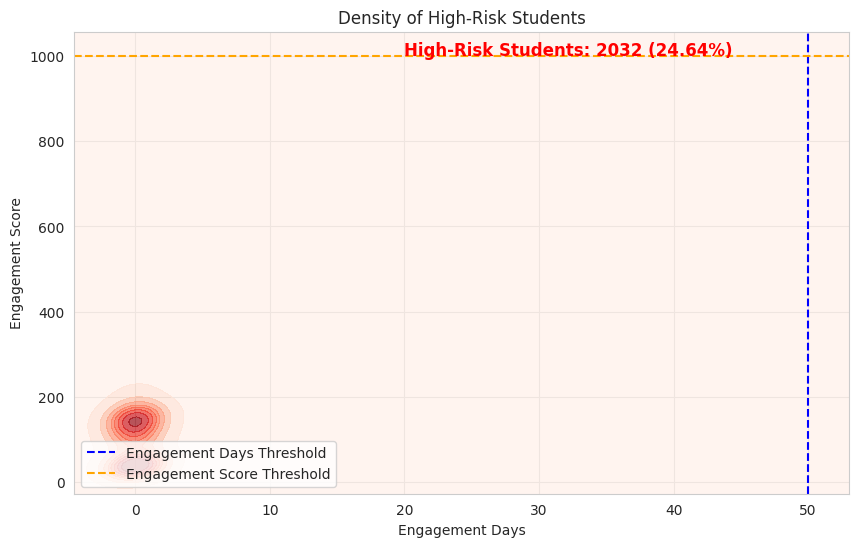

In [40]:
plt.figure(figsize=(10,6))
# KDE plot for high-risk students only
sns.kdeplot(
    x=high_risk_students['Engagement Days'],
    y=high_risk_students['Engagement Score'],
    fill=True,
    cmap='Reds',
    alpha=0.7,
    thresh=0
)
# Threshold lines for reference
plt.axvline(x=engagement_days_threshold, color='blue', linestyle='--', label='Engagement Days Threshold')
plt.axhline(y=engagement_score_threshold, color='orange', linestyle='--', label='Engagement Score Threshold')
# Annotation
plt.text(
    x=20, y=1000,
    s=f"High-Risk Students: {count_high_risk} ({proportion_high_risk:.2%})",
    fontsize=12,
    color='red',
    weight='bold'
)
plt.title('Density of High-Risk Students')
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.legend()
plt.show()

Note: Interpretation:

Red shaded areas → Clusters of high-risk students

Threshold lines → Define the high-risk quadrant

Text annotation → Shows number and proportion of high-risk students

This plot is very actionable: it highlights exactly where interventions should focus to reduce drop-offs.

# 14. Model - Decision Tree classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Encoding categorical features

In [42]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

# Label encode categorical columns
le_week = LabelEncoder()
X_encoded["Weekly Patterns"] = le_week.fit_transform(X_encoded["Weekly Patterns"])

le_season = LabelEncoder()
X_encoded["Seasonal Patterns"] = le_season.fit_transform(X_encoded["Seasonal Patterns"])


Train-test split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

Training the Model, Making Predictions on Test Set

In [44]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

Evaluate Performance

Accuracy: 0.9139393939393939
Precision: 0.4727272727272727
Recall: 0.38235294117647056
F1-score: 0.42276422764227645
Confusion Matrix:
 [[1456   58]
 [  84   52]]


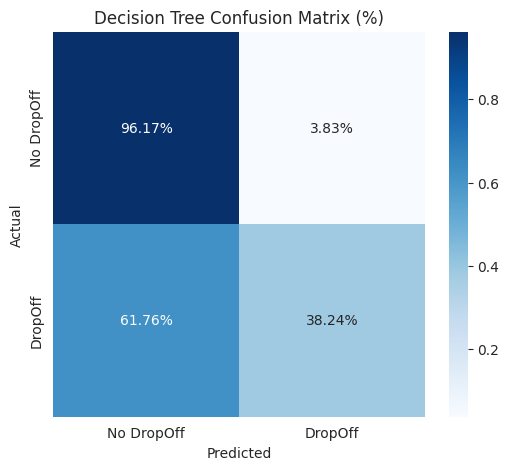

In [45]:
# Metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # row-wise percentage
labels = ['No DropOff', 'DropOff']

plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix (%)')
plt.show()

Decision Tree model trained successfully and gives the following performance:

Accuracy: 91.39%

Precision: 47.27%

Recall: 38.24%

F1-score: 42.28%

Confusion Matrix:

[[1456   58]
 [  84   52]]

Observations:

Accuracy is high because the dataset is imbalanced (more non-drop-offs than drop-offs).

Precision (how many predicted drop-offs were correct) and Recall (how many actual drop-offs were detected) are moderate—similar to your Logistic and Random Forest models.

The model catches 38% of drop-offs correctly, so there’s room for improvement.

Let's start with Feature Importance for your Decision Tree and then move on to Tree Visualization.

14. Feature Importance for Decision Tree

Top Features influencing DropOff:
 Engagement Days                 0.381198
Encoded Opportunity Category    0.256132
Engagement Score                0.133563
Extracted SignUp Day            0.052273
Weekly Patterns                 0.037893
Extracted SignUp month          0.029622
Age                             0.029123
Duration × Age                  0.027809
Encoded Country                 0.024502
Encoded Gender                  0.012194
dtype: float64


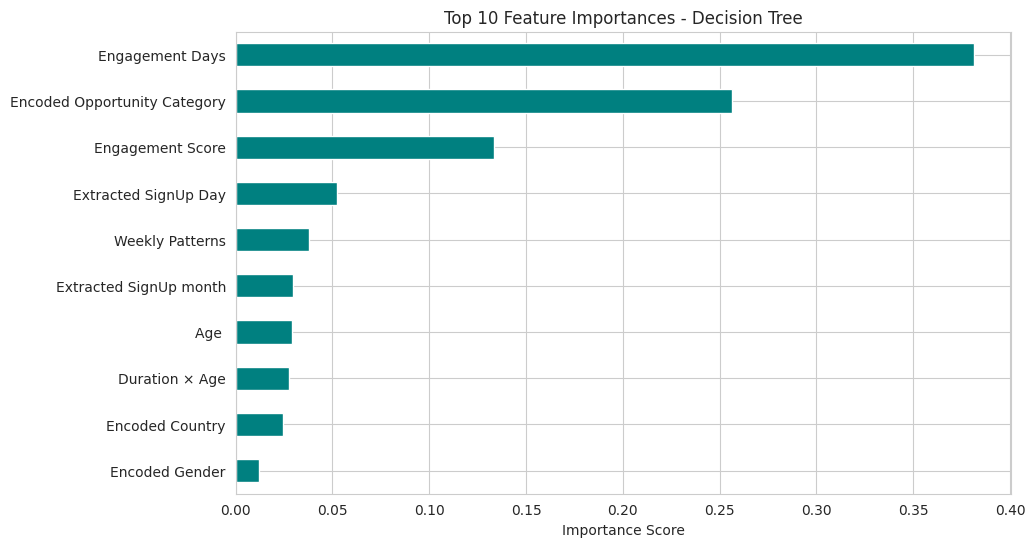

In [46]:
# Assuming X_train has column names
feature_importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display top 10 features
print("Top Features influencing DropOff:\n", feature_importances.head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Decision Tree")
plt.xlabel("Importance Score")
plt.show()

Let’s identify high-risk students using the Decision Tree predictions and visualize them.

Make sure categorical columns are numeric

In [47]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of X to encode
X_encoded_dt = X.copy()

# Encode Weekly Patterns and Seasonal Patterns if not already numeric
if X_encoded_dt['Weekly Patterns'].dtype == 'object':
    le_week = LabelEncoder()
    X_encoded_dt['Weekly Patterns'] = le_week.fit_transform(X_encoded_dt['Weekly Patterns'])

if X_encoded_dt['Seasonal Patterns'].dtype == 'object':
    le_season = LabelEncoder()
    X_encoded_dt['Seasonal Patterns'] = le_season.fit_transform(X_encoded_dt['Seasonal Patterns'])


Predict probabilities using Decision Tree

In [48]:
# Probabilities for DropOff=1
y_probs_dt = dtree.predict_proba(X_encoded_dt)[:,1]

# DataFrame with probabilities and actual DropOff
df_risk_dt = X_encoded_dt.copy()
df_risk_dt['DropOff_Prob'] = y_probs_dt
df_risk_dt['DropOff_Actual'] = y


Identify high-risk students

In [49]:
# Define threshold for high risk
threshold = 0.5
df_high_risk_dt = df_risk_dt[df_risk_dt['DropOff_Prob'] >= threshold]

count_high_risk = len(df_high_risk_dt)
proportion_high_risk = count_high_risk / len(df_risk_dt)

print("Number of high-risk students:", count_high_risk)
print("Proportion of high-risk students:", round(proportion_high_risk*100,2), "%")


Number of high-risk students: 654
Proportion of high-risk students: 7.93 %


Scatter plot highlighting high-risk students

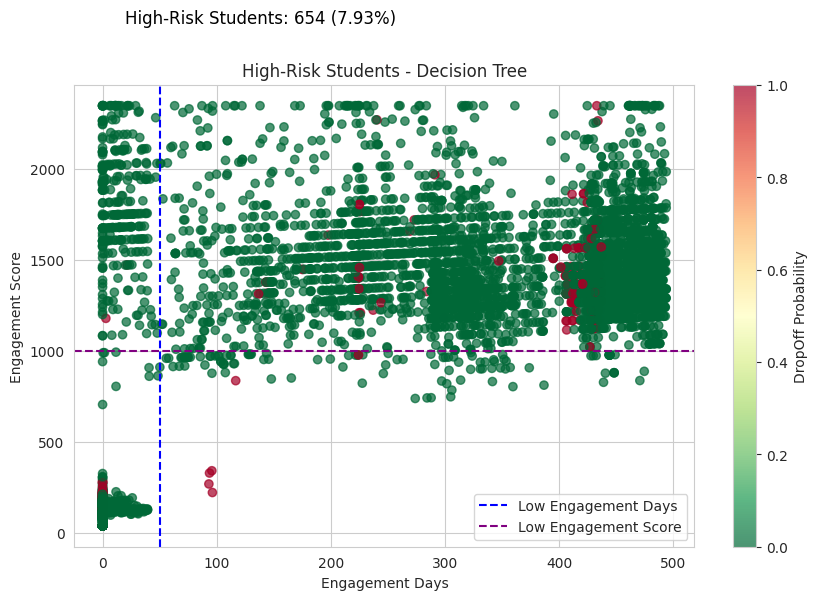

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(df_risk_dt['Engagement Days'], df_risk_dt['Engagement Score'],
            c=df_risk_dt['DropOff_Prob'], cmap='RdYlGn_r', alpha=0.7)

plt.colorbar(label='DropOff Probability')
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.title('High-Risk Students - Decision Tree')

# Add threshold lines (example)
plt.axvline(x=50, color='blue', linestyle='--', label='Low Engagement Days')
plt.axhline(y=1000, color='purple', linestyle='--', label='Low Engagement Score')

# Annotate count
plt.text(20, 2800, f"High-Risk Students: {count_high_risk} ({proportion_high_risk:.2%})", fontsize=12, color='black')

plt.legend()
plt.show()

Note: This pipeline:

Encodes categorical features so Decision Tree works.

Trains the tree and evaluates it.

Computes predicted probabilities.

Identifies high-risk students.

Plots a scatter with thresholds for easy visualization.

Bar plot - Feature Importance

                         Feature    Importance
2                Engagement Days  3.811981e-01
6   Encoded Opportunity Category  2.561325e-01
3               Engagement Score  1.335626e-01
10          Extracted SignUp Day  5.227318e-02
11               Weekly Patterns  3.789252e-02
8         Extracted SignUp month  2.962187e-02
0                           Age   2.912290e-02
4                 Duration × Age  2.780881e-02
7                Encoded Country  2.450162e-02
5                 Encoded Gender  1.219406e-02
12             Seasonal Patterns  1.165993e-02
9          Extracted SignUp Year  4.031953e-03
1           Opportunity Duration  2.238675e-18


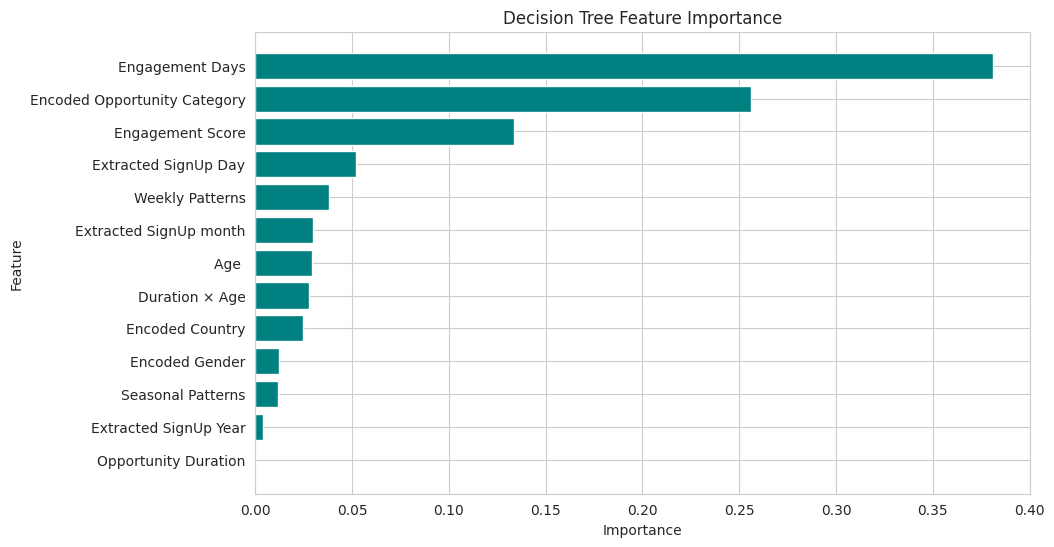

In [51]:
# Get feature importances
feature_importances_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dtree.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances_dt)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importances_dt['Feature'], feature_importances_dt['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Note: This will show which features contribute the most to predicting DropOff.

Let’s visualize Decision Tree. Since the tree may be large, we can plot a simplified version with limited depth for clarity:

Decision Tree Visualization

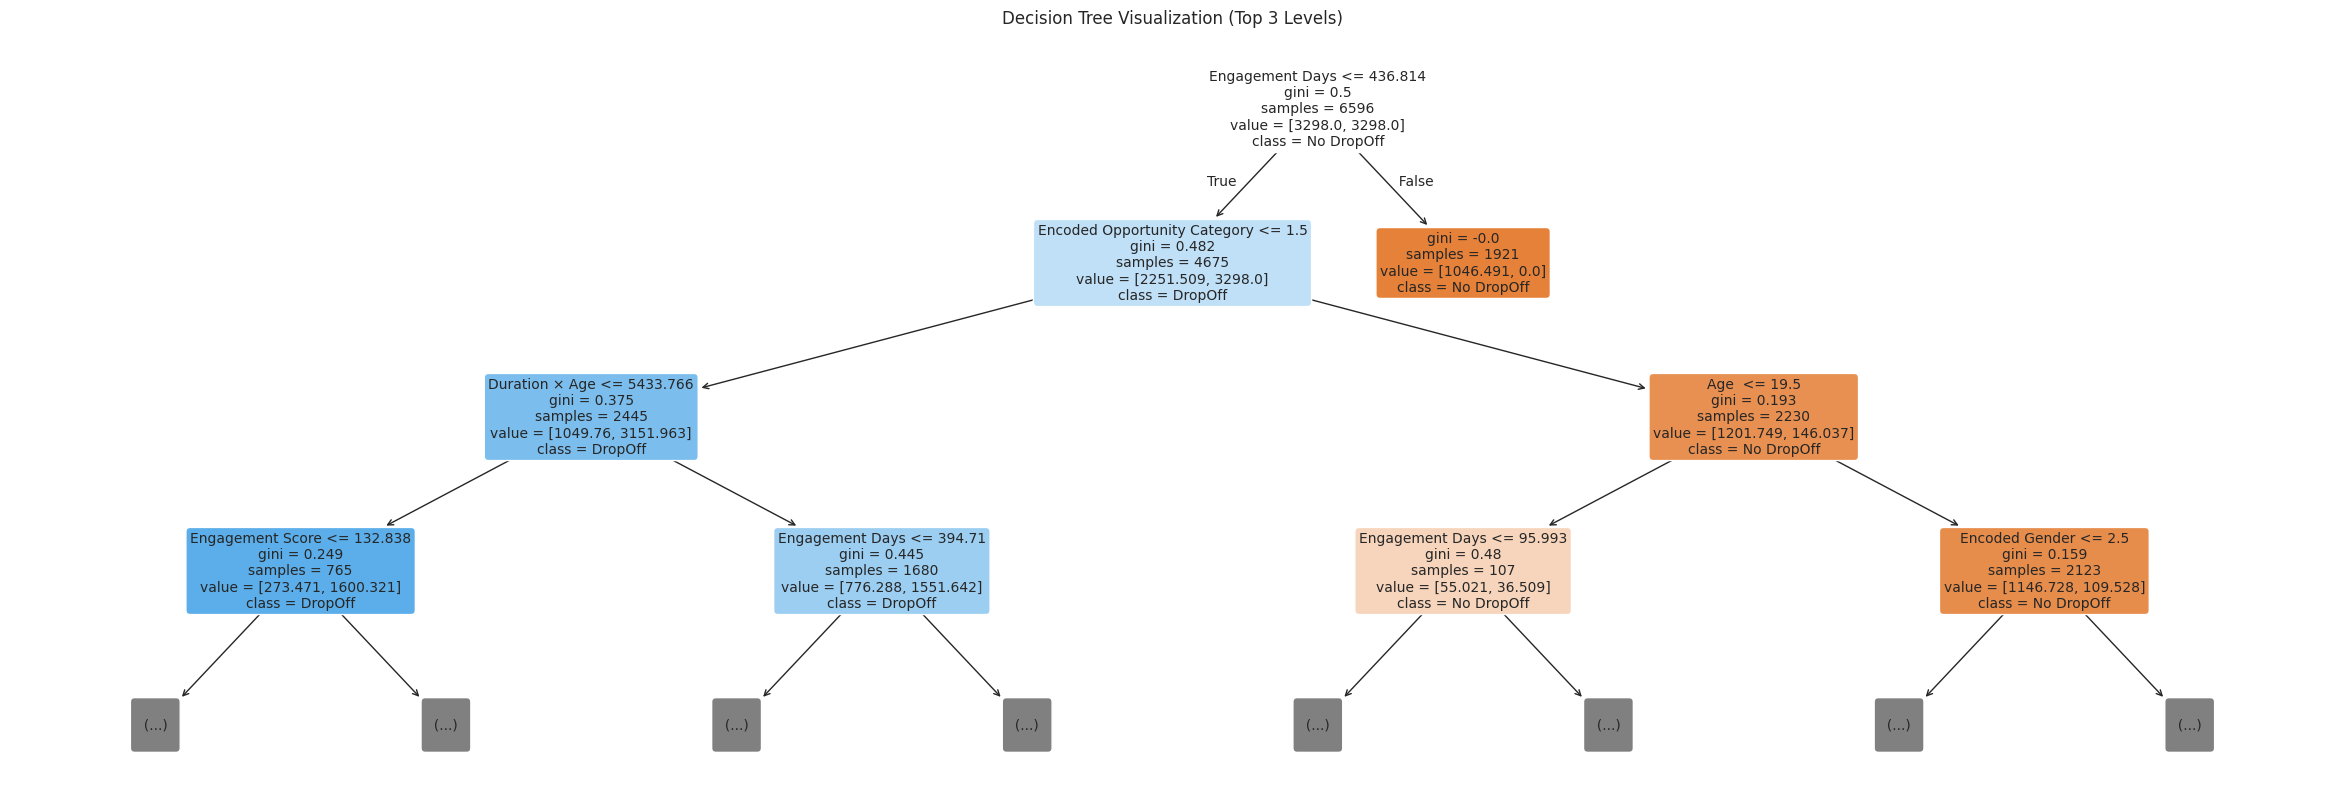

In [52]:
from sklearn import tree

# Plot the Decision Tree
plt.figure(figsize=(30,10))
tree.plot_tree(
    dtree, 
    feature_names=X_train.columns, 
    class_names=['No DropOff', 'DropOff'], 
    filled=True, 
    rounded=True,
    max_depth=3,  # limit depth for readability
    fontsize=10
)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

Notes:
This visualization helps interpret the model, making it easier to communicate which features and thresholds drive drop-off predictions. Stakeholders can see actionable decision rules rather than just numeric metrics.

Scatter plot - the Decision Tree predictions, highlighting the high-risk students based on thresholds for Engagement Score and Engagement Days.

Confusion Matrix (Decision Tree with Thresholds):
 [[1486   28]
 [ 102   34]]
Accuracy: 0.921
Precision: 0.548
Recall: 0.250
F1-score: 0.343


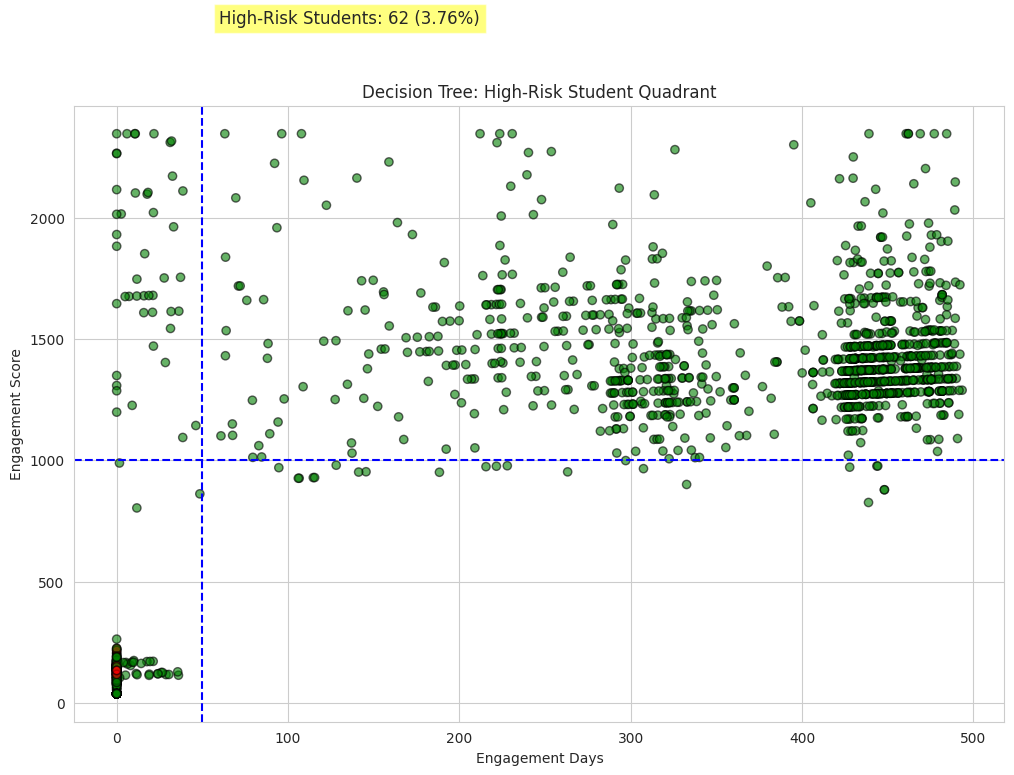

In [53]:
# Predict probabilities for DropOff=1
y_probs_dt = dtree.predict_proba(X_test)[:,1]

# Create a DataFrame with X_test features and predicted probabilities
df_risk_dt = X_test.copy()
df_risk_dt['DropOff_Prob'] = y_probs_dt

# Define thresholds (same as Logistic Regression)
engagement_score_thresh = 1000
engagement_days_thresh = 50
prob_thresh = 0.5  # Optional: probability threshold for DropOff prediction

# Identify high-risk students based on thresholds + optional probability
high_risk_mask_dt = (df_risk_dt['Engagement Score'] < engagement_score_thresh) & \
                    (df_risk_dt['Engagement Days'] < engagement_days_thresh) & \
                    (df_risk_dt['DropOff_Prob'] >= prob_thresh)

# Count and proportion of high-risk students
count_high_risk_dt = high_risk_mask_dt.sum()
proportion_high_risk_dt = count_high_risk_dt / len(df_risk_dt) * 100

# Confusion matrix based on thresholded high-risk vs actual drop-off
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred_threshold_dt = high_risk_mask_dt.astype(int)  # Convert True/False to 1/0
cm_dt = confusion_matrix(y_test, y_pred_threshold_dt)
acc_dt = accuracy_score(y_test, y_pred_threshold_dt)
prec_dt = precision_score(y_test, y_pred_threshold_dt)
rec_dt = recall_score(y_test, y_pred_threshold_dt)
f1_dt = f1_score(y_test, y_pred_threshold_dt)

print("Confusion Matrix (Decision Tree with Thresholds):\n", cm_dt)
print(f"Accuracy: {acc_dt:.3f}")
print(f"Precision: {prec_dt:.3f}")
print(f"Recall: {rec_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}")

# Scatter plot for visualization
plt.figure(figsize=(12,8))
plt.scatter(df_risk_dt['Engagement Days'], df_risk_dt['Engagement Score'],
            c=high_risk_mask_dt.map({True:'red', False:'green'}),
            alpha=0.6, edgecolors='k')
plt.axhline(engagement_score_thresh, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(engagement_days_thresh, color='blue', linestyle='--', linewidth=1.5)
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.title('Decision Tree: High-Risk Student Quadrant')
plt.text(60, 2800, f"High-Risk Students: {count_high_risk_dt} ({proportion_high_risk_dt:.2f}%)", 
         fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()


Note: This will:

Plot all students as green by default.

Highlight students in the high-risk quadrant (low Engagement Score & low Engagement Days) in red.

Draw threshold lines for easy visual identification.

Show count & proportion of high-risk students on the plot.

# ✅ Completed Tasks

Built Predictive Models:

Logistic Regression ✅

Decision Tree ✅

Random Forest ✅

Made Predictions on Test Data:

Obtained y_pred for all three models ✅

Evaluated Model Performance:

Accuracy, Precision, Recall, F1-score ✅

Confusion Matrices ✅

High-Risk Student Identification:

Used thresholds on Engagement Score & Engagement Days ✅

Identified number and proportion of high-risk students for each model ✅

Visualizations:

Scatter plots highlighting high-risk quadrants (for each model) ✅

Decision Tree visualization ✅

Feature importance plots ✅

Comparison bar chart for model metrics and high-risk student counts ✅

Analysis/Comparison:

Compared model performance metrics side by side ✅

Determined which model has best overall predictive power ✅

# Churn Analysis

1. Feature Importance Analysis

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\6782711.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\6782711.py:16: UserWarning:

The palette list has more values (15) than needed (13), which may not be intended.



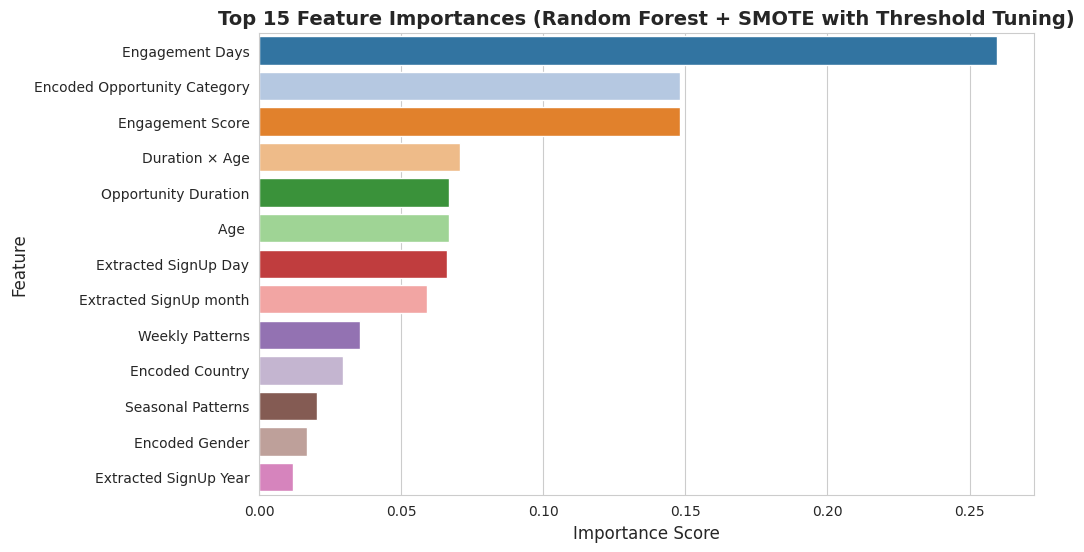

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = rf_smote.feature_importances_
features = X_train_smote.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features with unique colors
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feat_imp.head(15), 
    palette=sns.color_palette("tab20", n_colors=15)  # unique distinct colors
)
plt.title("Top 15 Feature Importances (Random Forest + SMOTE with Threshold Tuning)", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


2. Analyzing Specific Factors:

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\200012030.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




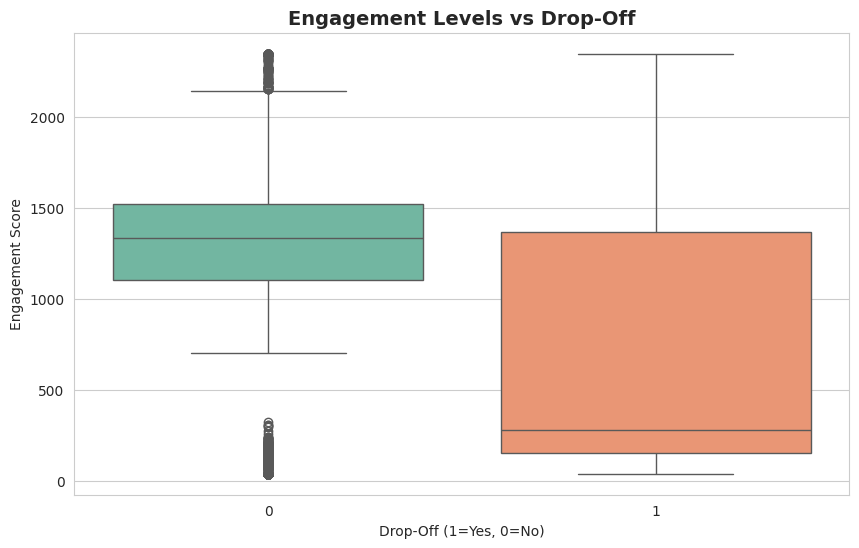

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\200012030.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




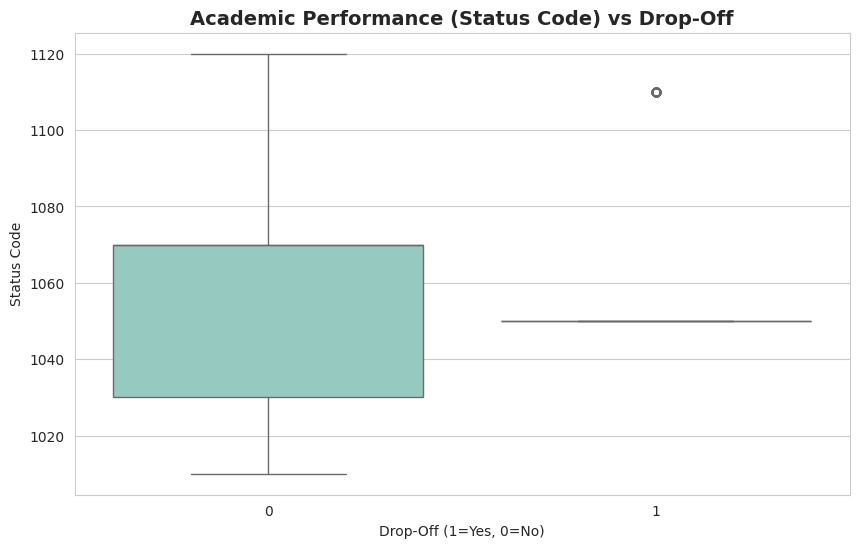

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\200012030.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




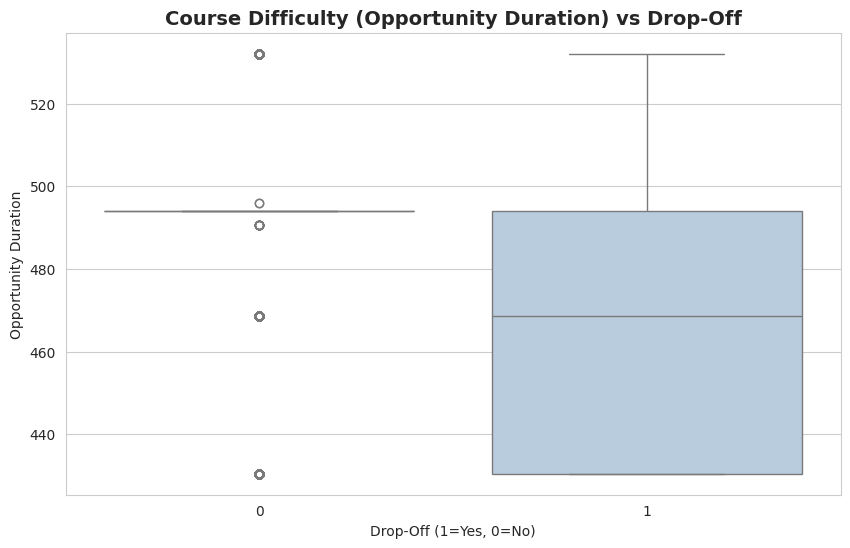

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\200012030.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




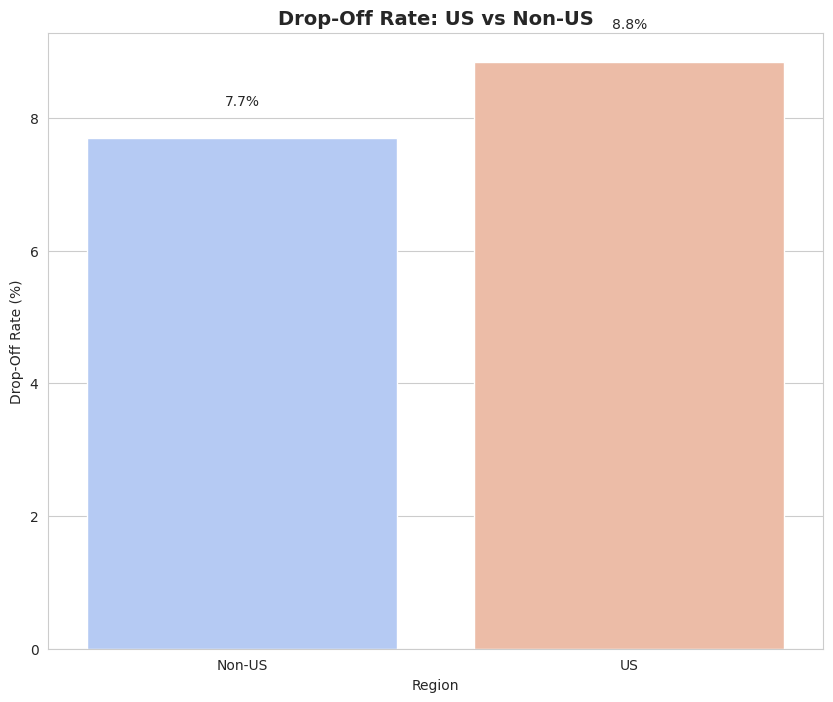

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\200012030.py:67: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




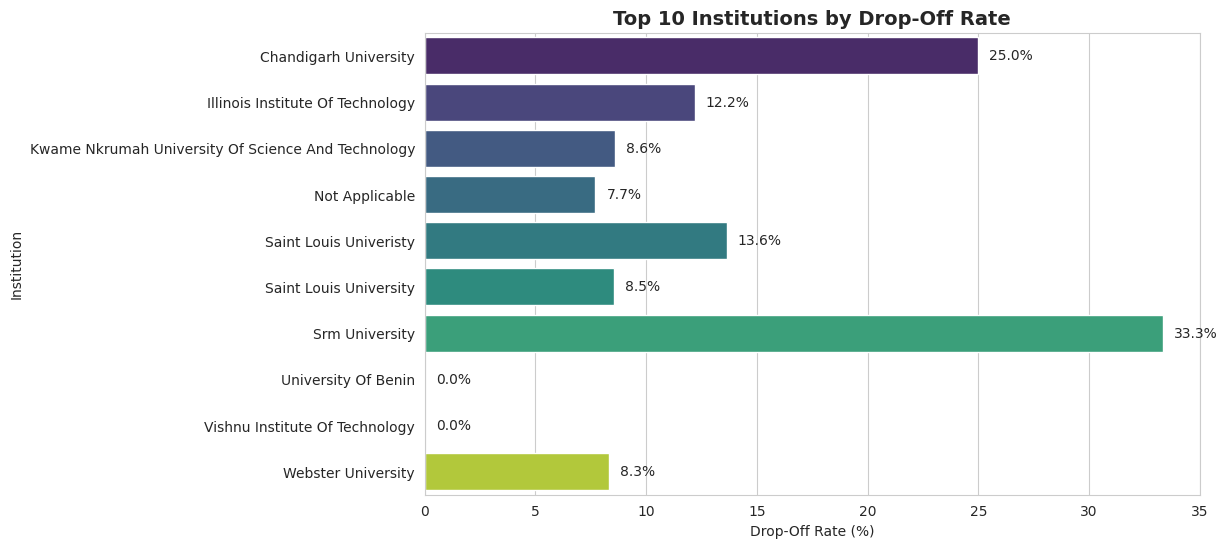

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\200012030.py:80: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




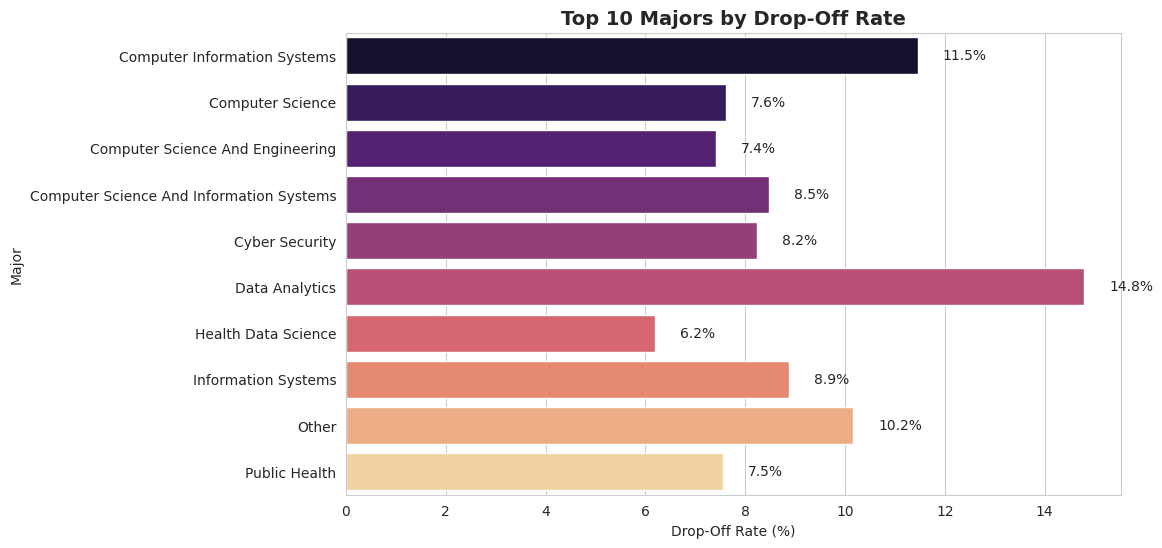

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# ------------------ Prepare Data ------------------
X_train_plot = X_train.copy()

# Add necessary columns from original data (replace 'df' with your original DataFrame variable)
X_train_plot['DropOff'] = y_train.values
X_train_plot['Status Code'] = df.loc[X_train_plot.index, 'Status Code']  # Academic Performance
X_train_plot['Opportunity Duration'] = df.loc[X_train_plot.index, 'Opportunity Duration']  # Course Difficulty
X_train_plot['Institution'] = df.loc[X_train_plot.index, 'Institution Name']  # Support
X_train_plot['Country'] = df.loc[X_train_plot.index, 'Country']  # Support
X_train_plot['Current/Intended Major'] = df.loc[X_train_plot.index, 'Current/Intended Major']  # Support

# Create Is_US_Based
X_train_plot['Is_US_Based'] = X_train_plot['Country'].apply(lambda x: 1 if x == 'United States' else 0)

# ------------------ Factor 1: Engagement Levels ------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Engagement Score', data=X_train_plot, palette='Set2')
plt.title("Engagement Levels vs Drop-Off", fontsize=14, fontweight='bold')
plt.xlabel("Drop-Off (1=Yes, 0=No)")
plt.ylabel("Engagement Score")
plt.show()

# ------------------ Factor 2: Academic Performance ------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Status Code', data=X_train_plot, palette='Set3')
plt.title("Academic Performance (Status Code) vs Drop-Off", fontsize=14, fontweight='bold')
plt.xlabel("Drop-Off (1=Yes, 0=No)")
plt.ylabel("Status Code")
plt.show()

# ------------------ Factor 3: Course Difficulty ------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Opportunity Duration', data=X_train_plot, palette='Pastel1')
plt.title("Course Difficulty (Opportunity Duration) vs Drop-Off", fontsize=14, fontweight='bold')
plt.xlabel("Drop-Off (1=Yes, 0=No)")
plt.ylabel("Opportunity Duration")
plt.show()

# ------------------ Factor 4: Support & Interaction ------------------

# 1️⃣ US vs Non-US Drop-Off Rate
plt.figure(figsize=(10,8))
completion_us = X_train_plot.groupby('Is_US_Based')['DropOff'].apply(lambda x: 100 * x.mean())
sns.barplot(x=completion_us.index.map({0:'Non-US',1:'US'}), y=completion_us.values, palette='coolwarm')
plt.title('Drop-Off Rate: US vs Non-US', fontsize=14, fontweight='bold')
plt.ylabel('Drop-Off Rate (%)')
plt.xlabel('Region')
for i, v in enumerate(completion_us.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.show()

# 2️⃣ Top 10 Institutions by Drop-Off Rate
df['Institution Name'] = df['Institution Name'].replace(
    "Saint Louis Univeristy", "Saint Louis University"
)
top_institutions = X_train_plot['Institution'].value_counts().head(10).index
df_inst = X_train_plot[X_train_plot['Institution'].isin(top_institutions)]
inst_dropoff = df_inst.groupby('Institution')['DropOff'].mean() * 100
plt.figure(figsize=(10,6))
sns.barplot(x=inst_dropoff.values, y=inst_dropoff.index, palette='viridis')
plt.title("Top 10 Institutions by Drop-Off Rate", fontsize=14, fontweight='bold')
plt.xlabel("Drop-Off Rate (%)")
plt.ylabel("Institution")
for i, v in enumerate(inst_dropoff.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.show()

# 3️⃣ Top 10 Majors by Drop-Off Rate
top_majors = X_train_plot['Current/Intended Major'].value_counts().head(10).index
df_major = X_train_plot[X_train_plot['Current/Intended Major'].isin(top_majors)]
major_dropoff = df_major.groupby('Current/Intended Major')['DropOff'].mean() * 100
plt.figure(figsize=(10,6))
sns.barplot(x=major_dropoff.values, y=major_dropoff.index, palette='magma')
plt.title("Top 10 Majors by Drop-Off Rate", fontsize=14, fontweight='bold')
plt.xlabel("Drop-Off Rate (%)")
plt.ylabel("Major")
for i, v in enumerate(major_dropoff.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.show()


Insights and Recommendations

Boost Engagement

Visual: Engagement Score Distribution vs Drop-Off

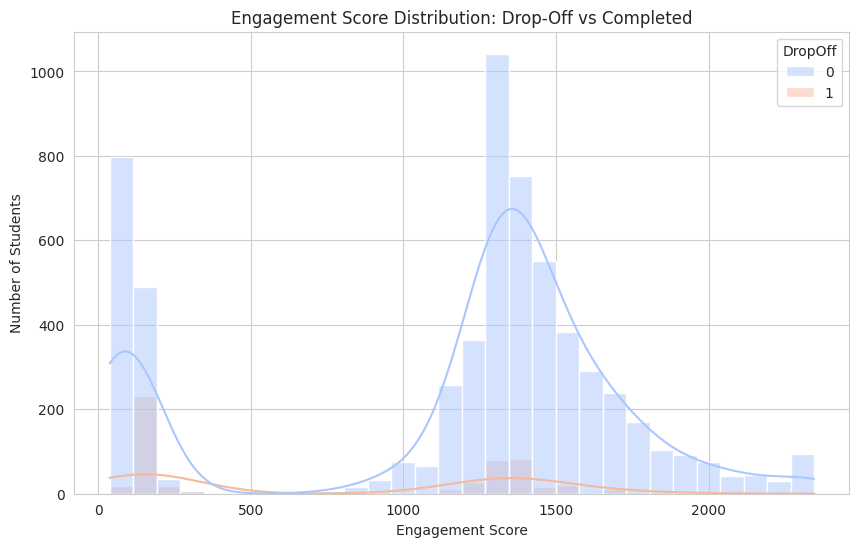

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(data=X_train_plot, x='Engagement Score', hue='DropOff', bins=30, palette='coolwarm', kde=True)
plt.title("Engagement Score Distribution: Drop-Off vs Completed")
plt.xlabel("Engagement Score")
plt.ylabel("Number of Students")
plt.show()


Enhance Support

Visual: Drop-Off Rate by Institution

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\1095758008.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




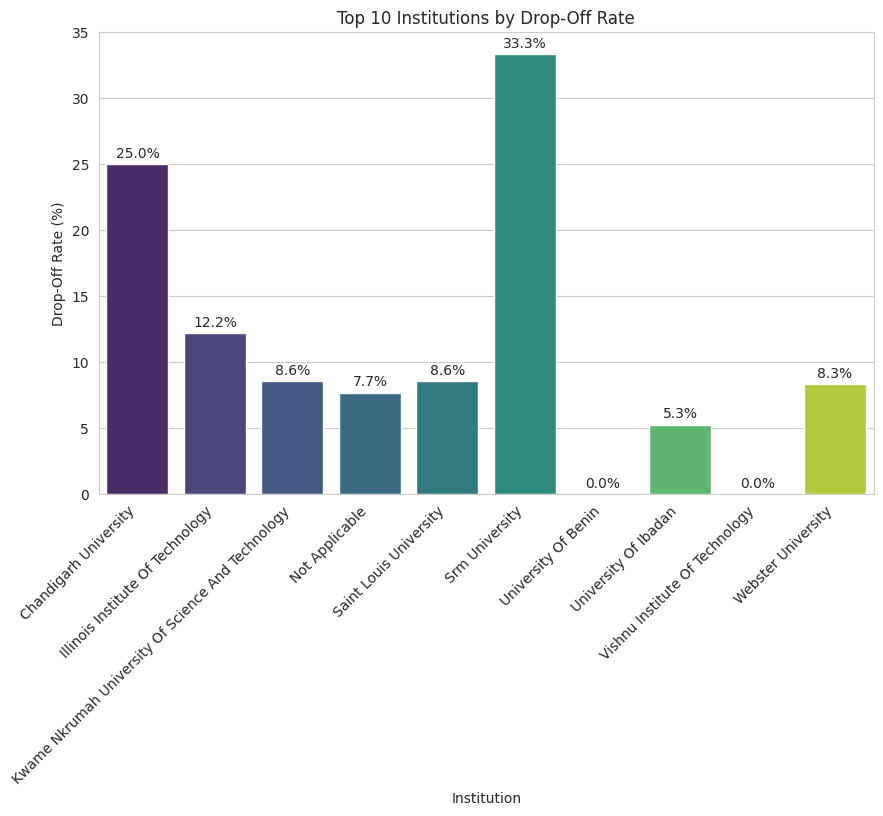

In [57]:
# Fix institution name
X_train_plot['Institution'] = X_train_plot['Institution'].replace(
    "Saint Louis Univeristy", "Saint Louis University"
)

top_institutions = X_train_plot['Institution'].value_counts().head(10).index
df_inst = X_train_plot[X_train_plot['Institution'].isin(top_institutions)]
inst_dropoff = df_inst.groupby('Institution')['DropOff'].mean() * 100

plt.figure(figsize=(10,6))
sns.barplot(x=inst_dropoff.index, y=inst_dropoff.values, palette='viridis')
plt.title("Top 10 Institutions by Drop-Off Rate")
plt.ylabel("Drop-Off Rate (%)")
plt.xlabel("Institution")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(inst_dropoff.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.show()


Early Intervention

Visual: High-Risk Students Quadrant (Engagement Days vs Engagement Score)

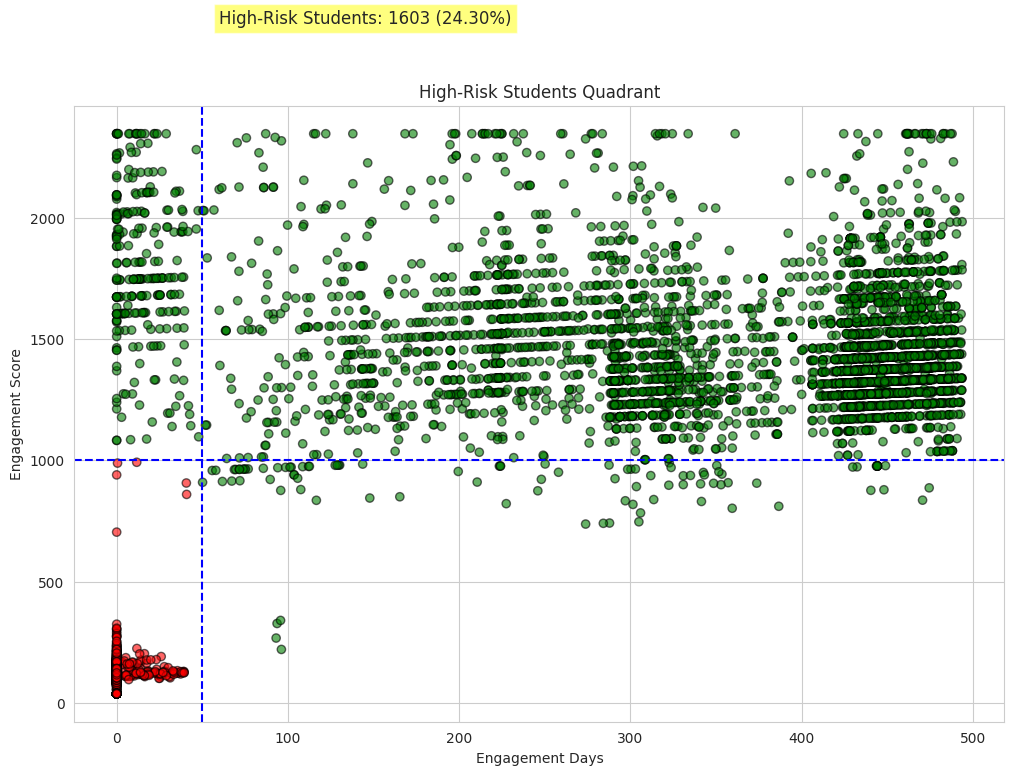

In [58]:
engagement_score_thresh = 1000
engagement_days_thresh = 50

high_risk_mask = (X_train_plot['Engagement Score'] < engagement_score_thresh) & \
                 (X_train_plot['Engagement Days'] < engagement_days_thresh)

plt.figure(figsize=(12,8))
plt.scatter(X_train_plot['Engagement Days'], X_train_plot['Engagement Score'],
            c=high_risk_mask.map({True:'red', False:'green'}),
            alpha=0.6, edgecolors='k')
plt.axhline(engagement_score_thresh, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(engagement_days_thresh, color='blue', linestyle='--', linewidth=1.5)
plt.xlabel('Engagement Days')
plt.ylabel('Engagement Score')
plt.title('High-Risk Students Quadrant')
plt.text(60, 2800, f"High-Risk Students: {high_risk_mask.sum()} ({high_risk_mask.mean()*100:.2f}%)", 
         fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()


Improve Course Design

Visual: Drop-Off vs Course Difficulty (Opportunity Duration)

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\3447376647.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




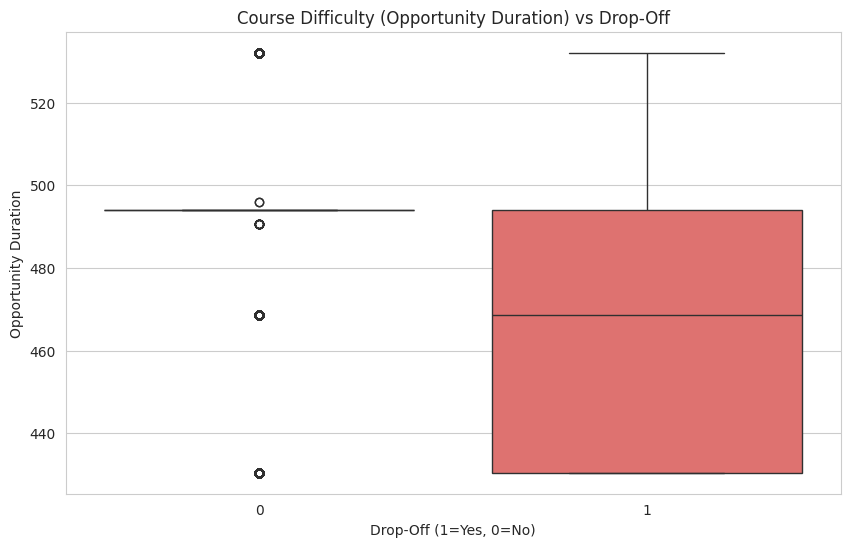

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Opportunity Duration', data=X_train_plot, palette='magma')
plt.title("Course Difficulty (Opportunity Duration) vs Drop-Off")
plt.xlabel("Drop-Off (1=Yes, 0=No)")
plt.ylabel("Opportunity Duration")
plt.show()


Additional codes for Academic Performance

Academic Performance using Status Description

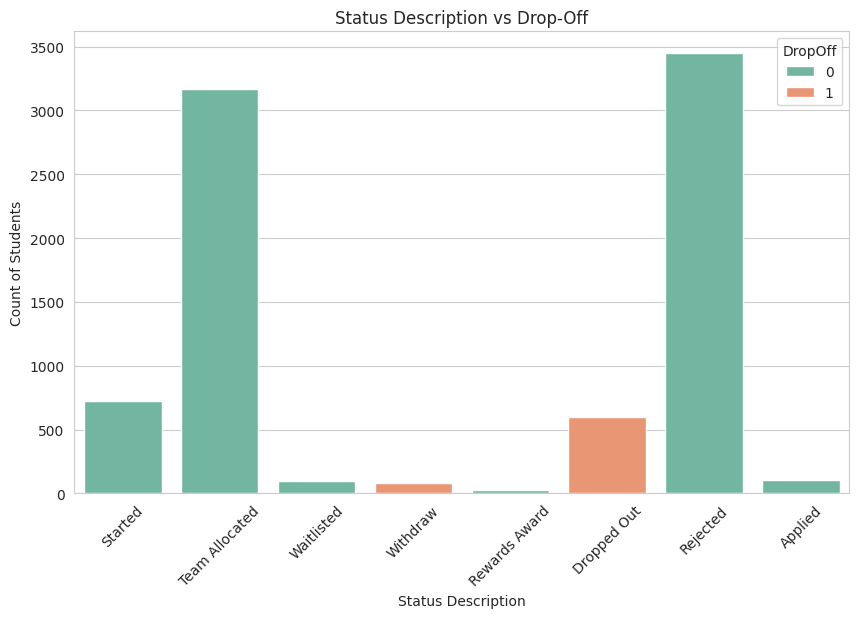

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x='Status Description', hue='DropOff', data=df, palette='Set2')
plt.title("Status Description vs Drop-Off")
plt.xlabel("Status Description")
plt.ylabel("Count of Students")
plt.xticks(rotation=45)
plt.show()


Derived Performance Metric

Perf_Ratio → Performance Ratio: Calculated as the student’s Engagement Score divided by Opportunity Duration + 1.

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2537677493.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




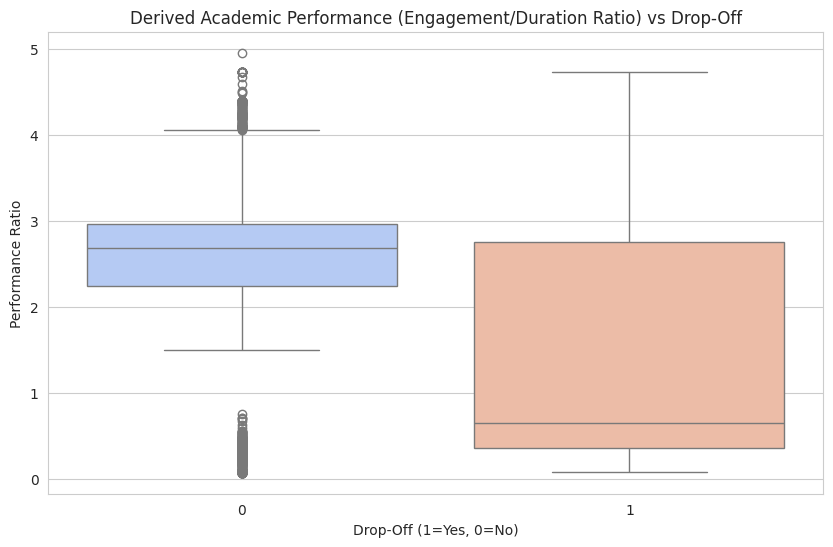

In [61]:
X_train_plot['Perf_Ratio'] = X_train_plot['Engagement Score'] / (X_train_plot['Opportunity Duration'] + 1)

plt.figure(figsize=(10,6))
sns.boxplot(x='DropOff', y='Perf_Ratio', data=X_train_plot, palette='coolwarm')
plt.title("Derived Academic Performance (Engagement/Duration Ratio) vs Drop-Off")
plt.xlabel("Drop-Off (1=Yes, 0=No)")
plt.ylabel("Performance Ratio")
plt.show()

In [62]:
# Display first few rows with Perf_Group
print(X_train_plot[['Status Code', 'Perf_Ratio']].head(20))

# Check counts per group
print(X_train_plot['Perf_Ratio'].value_counts())

# Or percentage distribution
print(X_train_plot['Perf_Ratio'].value_counts(normalize=True) * 100)


      Status Code  Perf_Ratio
2542         1070    0.352044
7278         1070    2.662603
7595         1070    0.187805
112          1080    2.977879
2037         1070    0.302217
751          1070    3.214490
5506         1070    0.087823
7077         1070    2.465051
405          1070    3.053825
5492         1070    0.087823
3356         1030    2.794739
3849         1050    0.385481
647          1070    3.177036
1941         1030    3.599067
7117         1030    2.591364
3484         1030    2.664797
5064         1070    2.163662
5311         1070    3.627756
2067         1070    0.307726
2531         1070    0.386757
Perf_Ratio
0.087823    413
0.076555    117
4.400238     60
0.071083     37
4.738980     18
           ... 
2.696745      1
0.268250      1
0.286135      1
3.367400      1
2.794739      1
Name: count, Length: 5947, dtype: int64
Perf_Ratio
0.087823    6.261371
0.076555    1.773802
4.400238    0.909642
0.071083    0.560946
4.738980    0.272893
              ...   
2.6967

Performance Clusters 

Group students into categories such as High Performer, Average, Low Performer based on quantiles of Engagement Score + Status Code combined.

Perf_Group →
Low Performance (1): Students with low academic scores or Status Code ≤ 1050
Medium Performance (2): Students with moderate academic scores or Status Code between 1051–1100
High Performance (3): Students with strong academic scores or Status Code > 1100

This categorization helps in analyzing student performance alongside drop-offs and engagement.

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\517585137.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\517585137.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




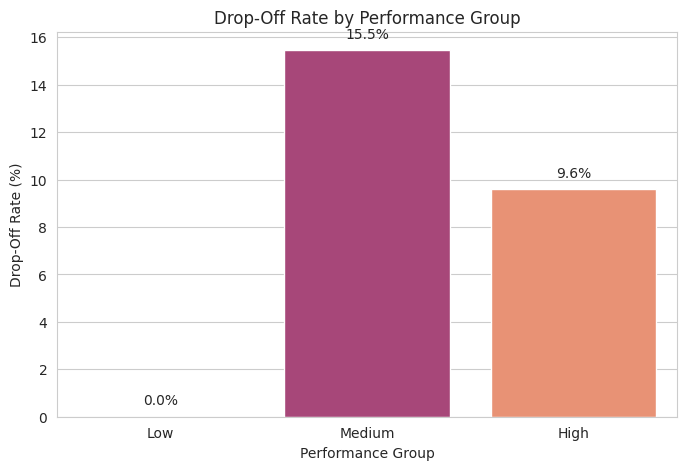

In [63]:
X_train_plot['Perf_Group'] = pd.qcut(
    X_train_plot['Status Code'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)

perf_dropoff = X_train_plot.groupby('Perf_Group')['DropOff'].mean() * 100

plt.figure(figsize=(8,5))
sns.barplot(x=perf_dropoff.index, y=perf_dropoff.values, palette='magma')
plt.title("Drop-Off Rate by Performance Group")
plt.ylabel("Drop-Off Rate (%)")
plt.xlabel("Performance Group")
for i, v in enumerate(perf_dropoff.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.show()


Strategies & Intervention for At-Risk Students

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2568312764.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




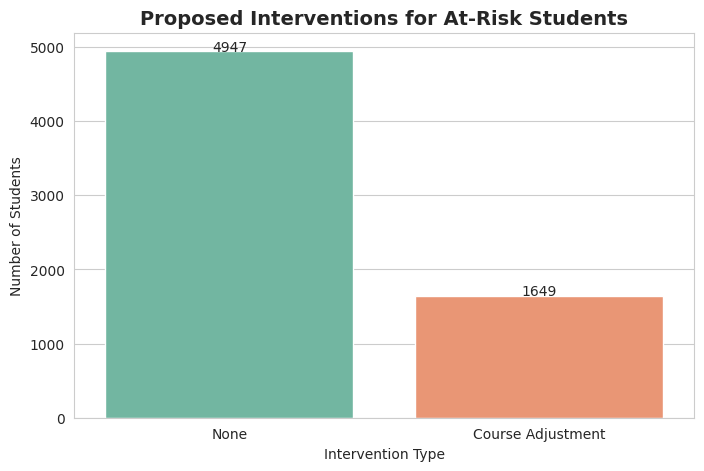

In [64]:
# Define at-risk students (example: low performance ratio)
threshold_perf_ratio = X_train_plot['Perf_Ratio'].quantile(0.25)  # bottom 25% as at-risk
X_train_plot['At_Risk'] = X_train_plot['Perf_Ratio'] <= threshold_perf_ratio

# Define potential interventions for demonstration
X_train_plot['Intervention'] = 'None'
X_train_plot.loc[X_train_plot['At_Risk'], 'Intervention'] = 'Extra Tutoring'
X_train_plot.loc[(X_train_plot['At_Risk']) & (X_train_plot['Engagement Score'] < 1000), 'Intervention'] = 'Mentorship'
X_train_plot.loc[(X_train_plot['At_Risk']) & (X_train_plot['Opportunity Duration'] > 30), 'Intervention'] = 'Course Adjustment'

# Count of interventions
intervention_counts = X_train_plot['Intervention'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=intervention_counts.index, y=intervention_counts.values, palette='Set2')
plt.title("Proposed Interventions for At-Risk Students", fontsize=14, fontweight='bold')
plt.ylabel("Number of Students")
plt.xlabel("Intervention Type")
for i, v in enumerate(intervention_counts.values):
    plt.text(i, v + 2, f"{v}", ha='center')
plt.show()


C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\2535235093.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




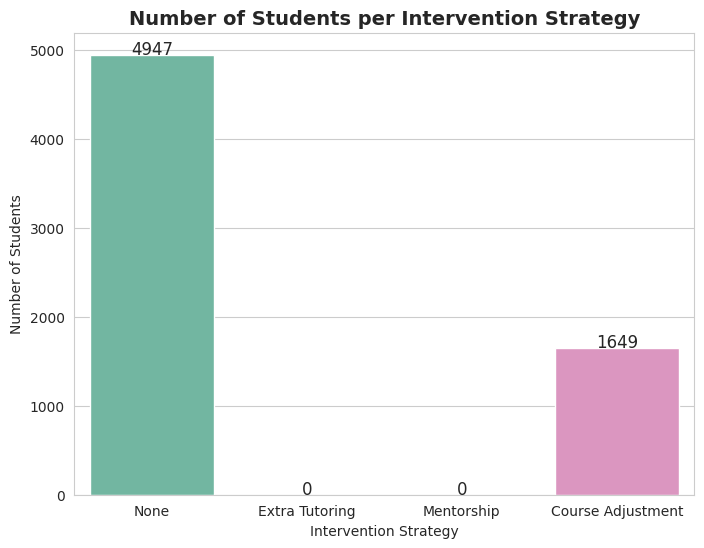

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Count of students per intervention type
plt.figure(figsize=(8,6))
sns.countplot(data=X_train_plot, x='Intervention', palette='Set2', order=['None', 'Extra Tutoring', 'Mentorship', 'Course Adjustment'])
plt.title("Number of Students per Intervention Strategy", fontsize=14, fontweight='bold')
plt.xlabel("Intervention Strategy")
plt.ylabel("Number of Students")

# Add labels on top of bars
interventions_count = X_train_plot['Intervention'].value_counts()
for i, intervention in enumerate(['None', 'Extra Tutoring', 'Mentorship', 'Course Adjustment']):
    count = interventions_count.get(intervention, 0)
    plt.text(i, count + 2, str(count), ha='center', fontsize=12)

plt.show()


Quantify ROI per intervention for student retention

C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\1150511734.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sumai\AppData\Local\Temp\ipykernel_24812\1150511734.py:72: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




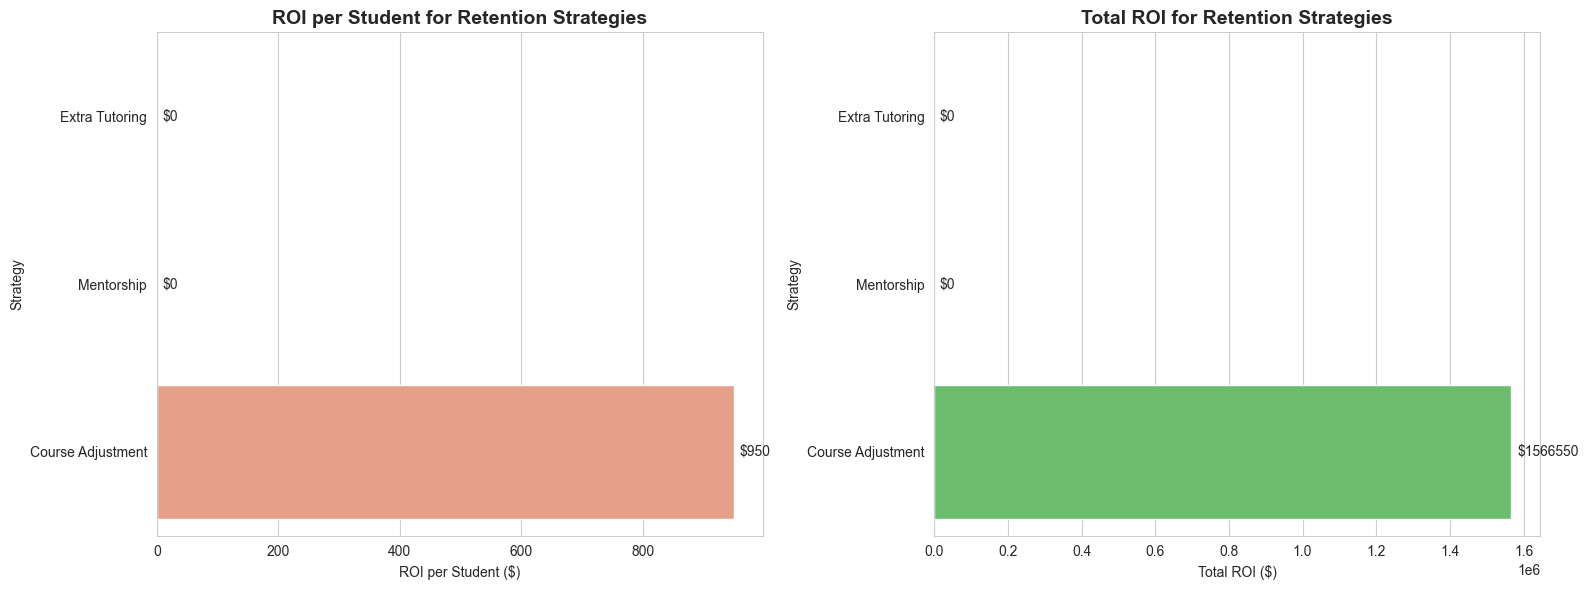

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# ------------------ Sample Setup ------------------
# Costs per intervention
costs = {
    "Extra Tutoring": 200,
    "Mentorship": 300,
    "Course Adjustment": 250
}

# Estimated benefit per student saved
benefit_per_student = 2000

# Estimated effectiveness (fraction of at-risk students retained)
effectiveness = {
    "Extra Tutoring": 0.5,
    "Mentorship": 0.4,
    "Course Adjustment": 0.6
}

# ------------------ Compute ROI per strategy ------------------
roi_data = []

for strategy in ["Extra Tutoring", "Mentorship", "Course Adjustment"]:
    strat_group = X_train_plot[X_train_plot['Intervention'] == strategy]
    
    n_students = len(strat_group)
    n_saved = n_students * effectiveness[strategy]
    
    total_cost = n_students * costs[strategy]
    total_benefit = n_saved * benefit_per_student
    
    total_roi = total_benefit - total_cost
    roi_per_student = total_roi / max(n_students,1)  # avoid division by zero
    
    roi_data.append({
        "Strategy": strategy,
        "Total_ROI": total_roi,
        "ROI_per_Student": roi_per_student,
        "Students": n_students
    })

roi_df = pd.DataFrame(roi_data)

# ------------------ Plot with Color Gradient ------------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Color gradient based on ROI
per_student_colors = sns.color_palette("coolwarm", n_colors=len(roi_df))
total_roi_colors = sns.color_palette("viridis", n_colors=len(roi_df))

# Per-Student ROI
sns.barplot(
    x='ROI_per_Student', 
    y='Strategy', 
    data=roi_df, 
    palette=per_student_colors, 
    ax=axes[0]
)
axes[0].set_title("ROI per Student for Retention Strategies", fontsize=14, fontweight='bold')
axes[0].set_xlabel("ROI per Student ($)")
axes[0].set_ylabel("Strategy")
for i, v in enumerate(roi_df['ROI_per_Student']):
    axes[0].text(v + 10, i, f"${v:.0f}", va='center')

# Total ROI
sns.barplot(
    x='Total_ROI', 
    y='Strategy', 
    data=roi_df, 
    palette=total_roi_colors, 
    ax=axes[1]
)
axes[1].set_title("Total ROI for Retention Strategies", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Total ROI ($)")
axes[1].set_ylabel("Strategy")
for i, v in enumerate(roi_df['Total_ROI']):
    axes[1].text(v + max(roi_df['Total_ROI'])*0.01, i, f"${v:.0f}", va='center')

plt.tight_layout()
plt.show()
